In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
plt.rcParams['figure.figsize']=(20,20)

In [2]:
data = pd.read_csv(r'healthcare-dataset-stroke-data.csv')

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
data.shape

(5110, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [8]:
data['bmi'].fillna(data['bmi'].mean())

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [9]:
data.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
data['bmi'].fillna(data['bmi'].mean(),inplace = True)

In [11]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [13]:
data.drop('id',axis=1,inplace=True)

In [14]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


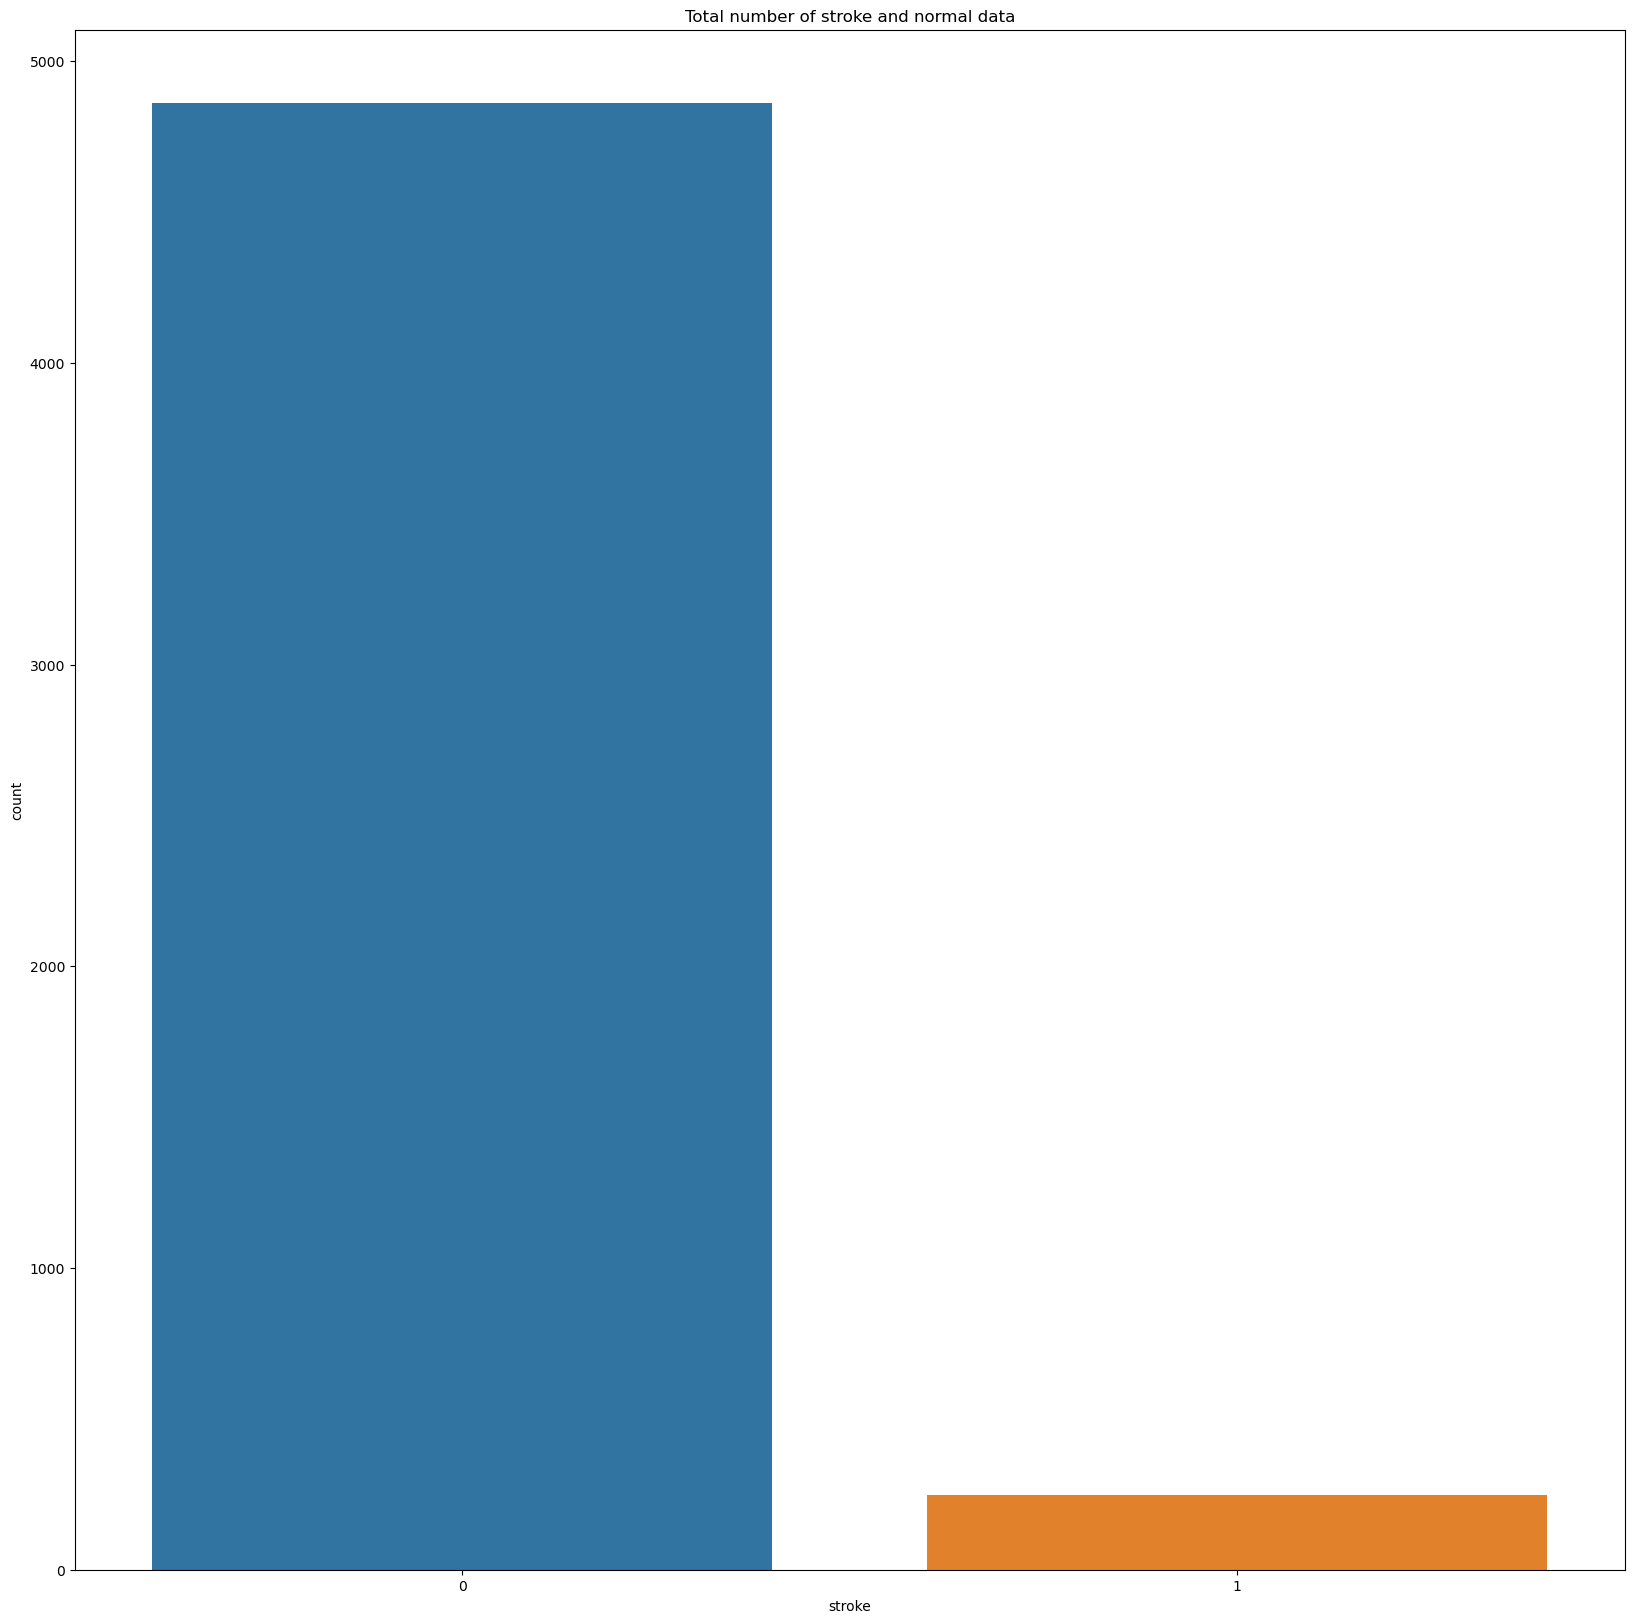

In [15]:
sns.countplot(data=data,x='stroke')
plt.title('Total number of stroke and normal data')
plt.show()

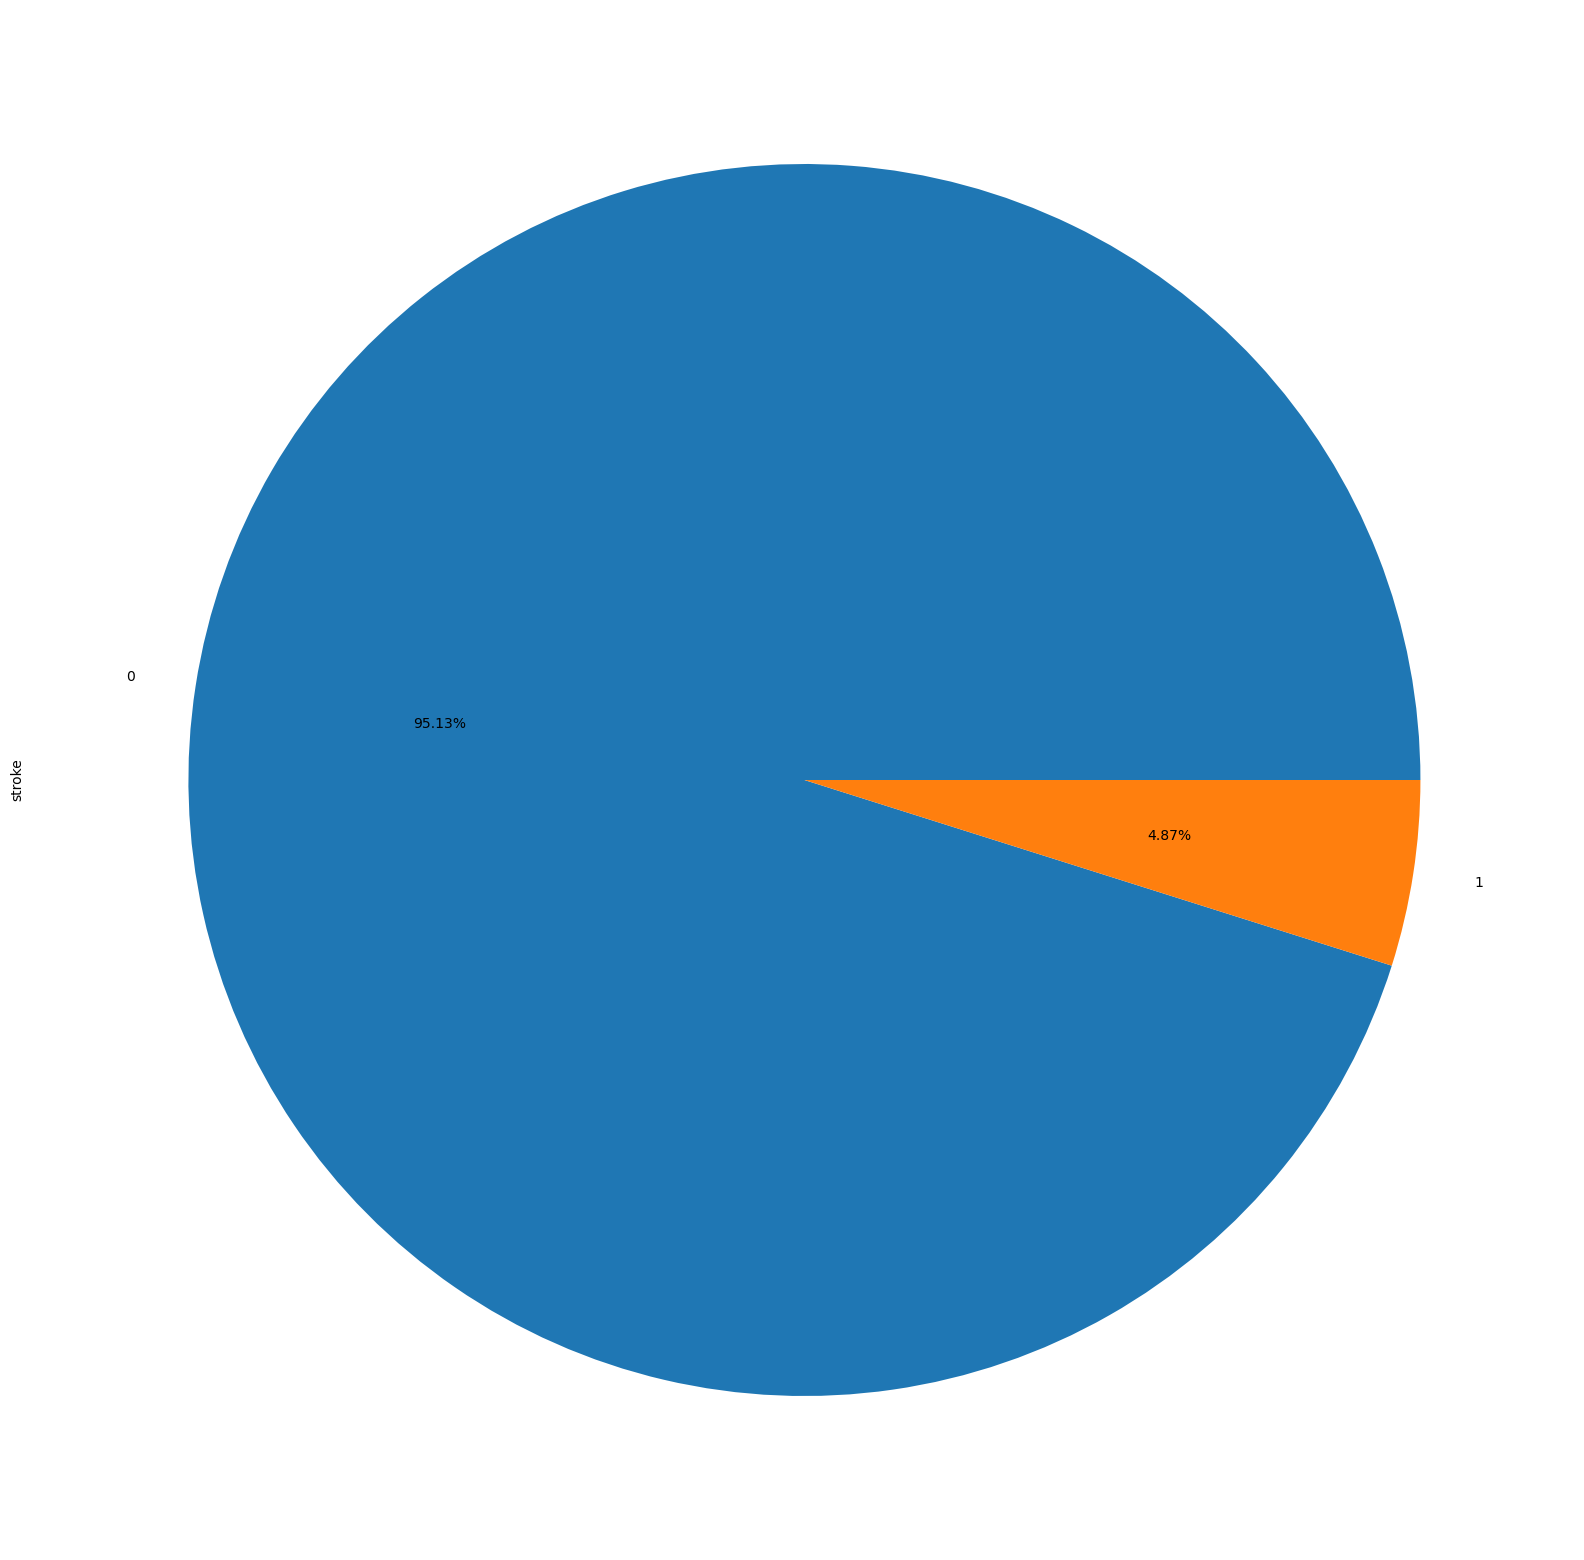

In [16]:
data['stroke'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()


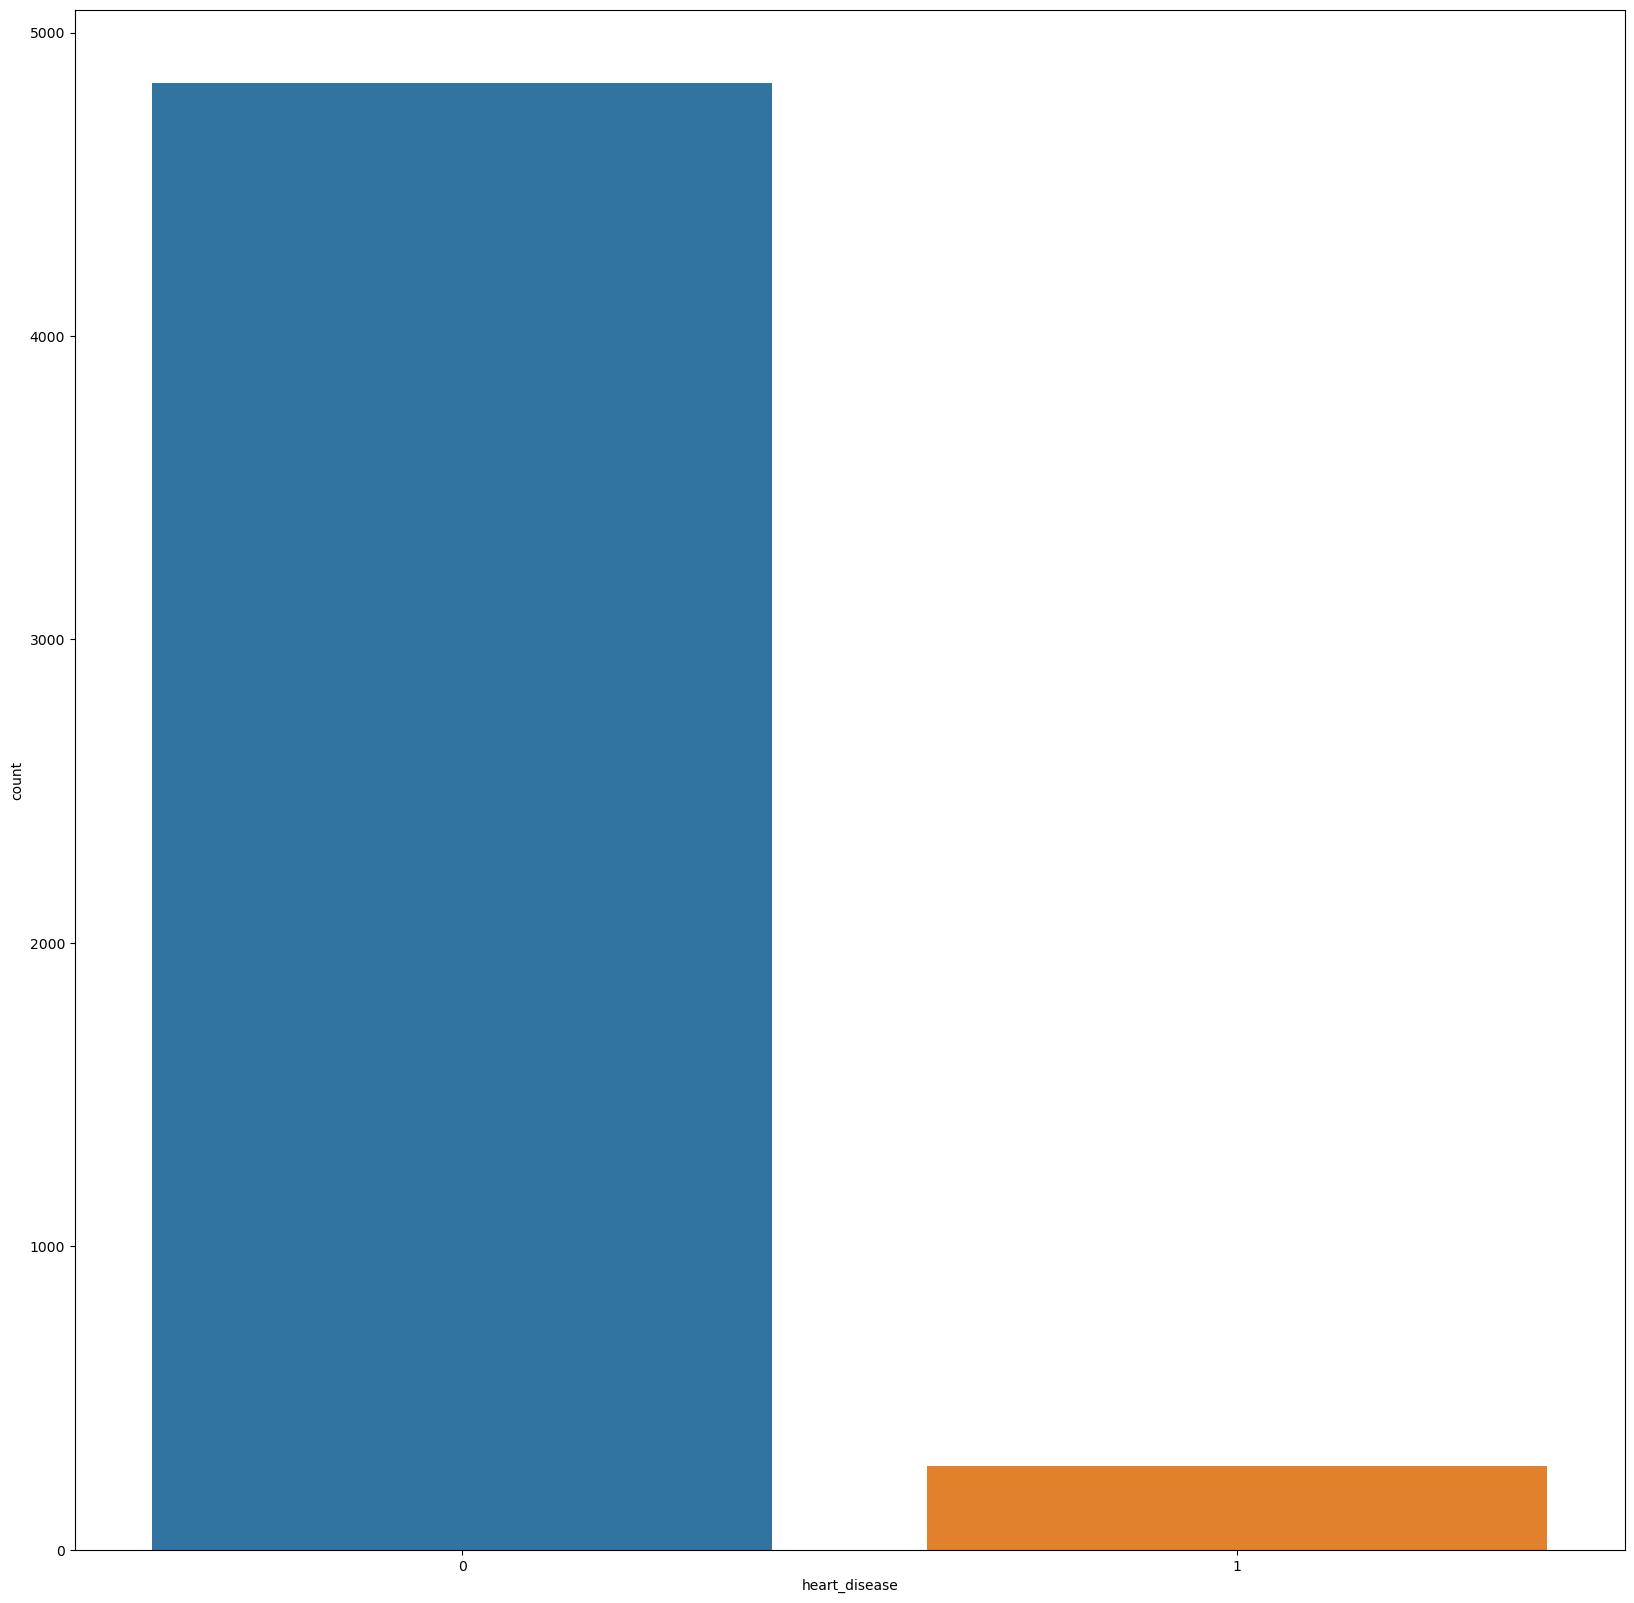

In [17]:
sns.countplot(data=data,x='heart_disease')
plt.show()


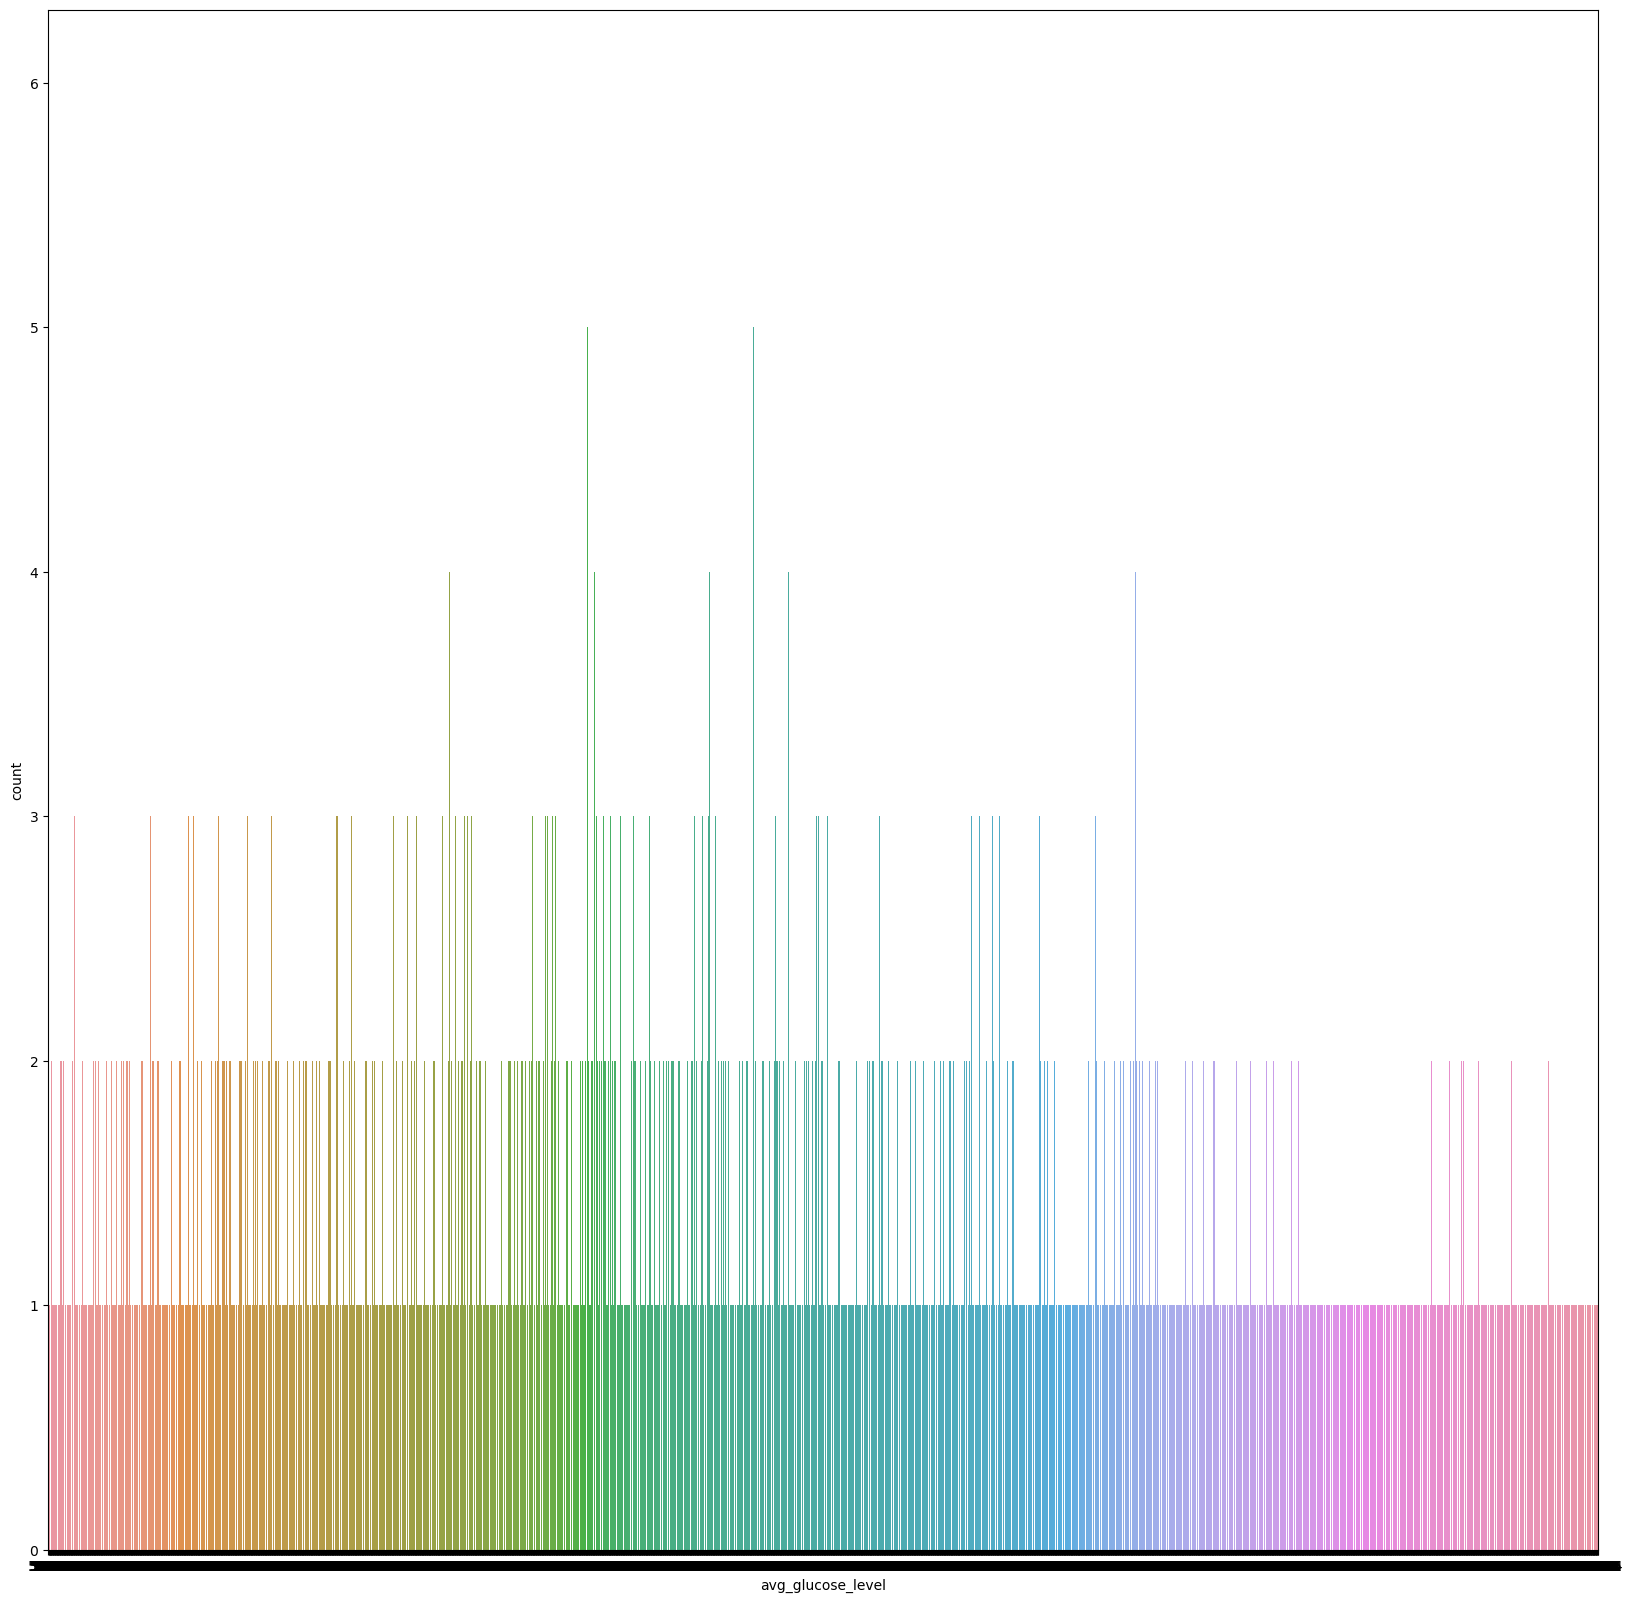

In [18]:
sns.countplot(data=data,x='avg_glucose_level')
plt.show()


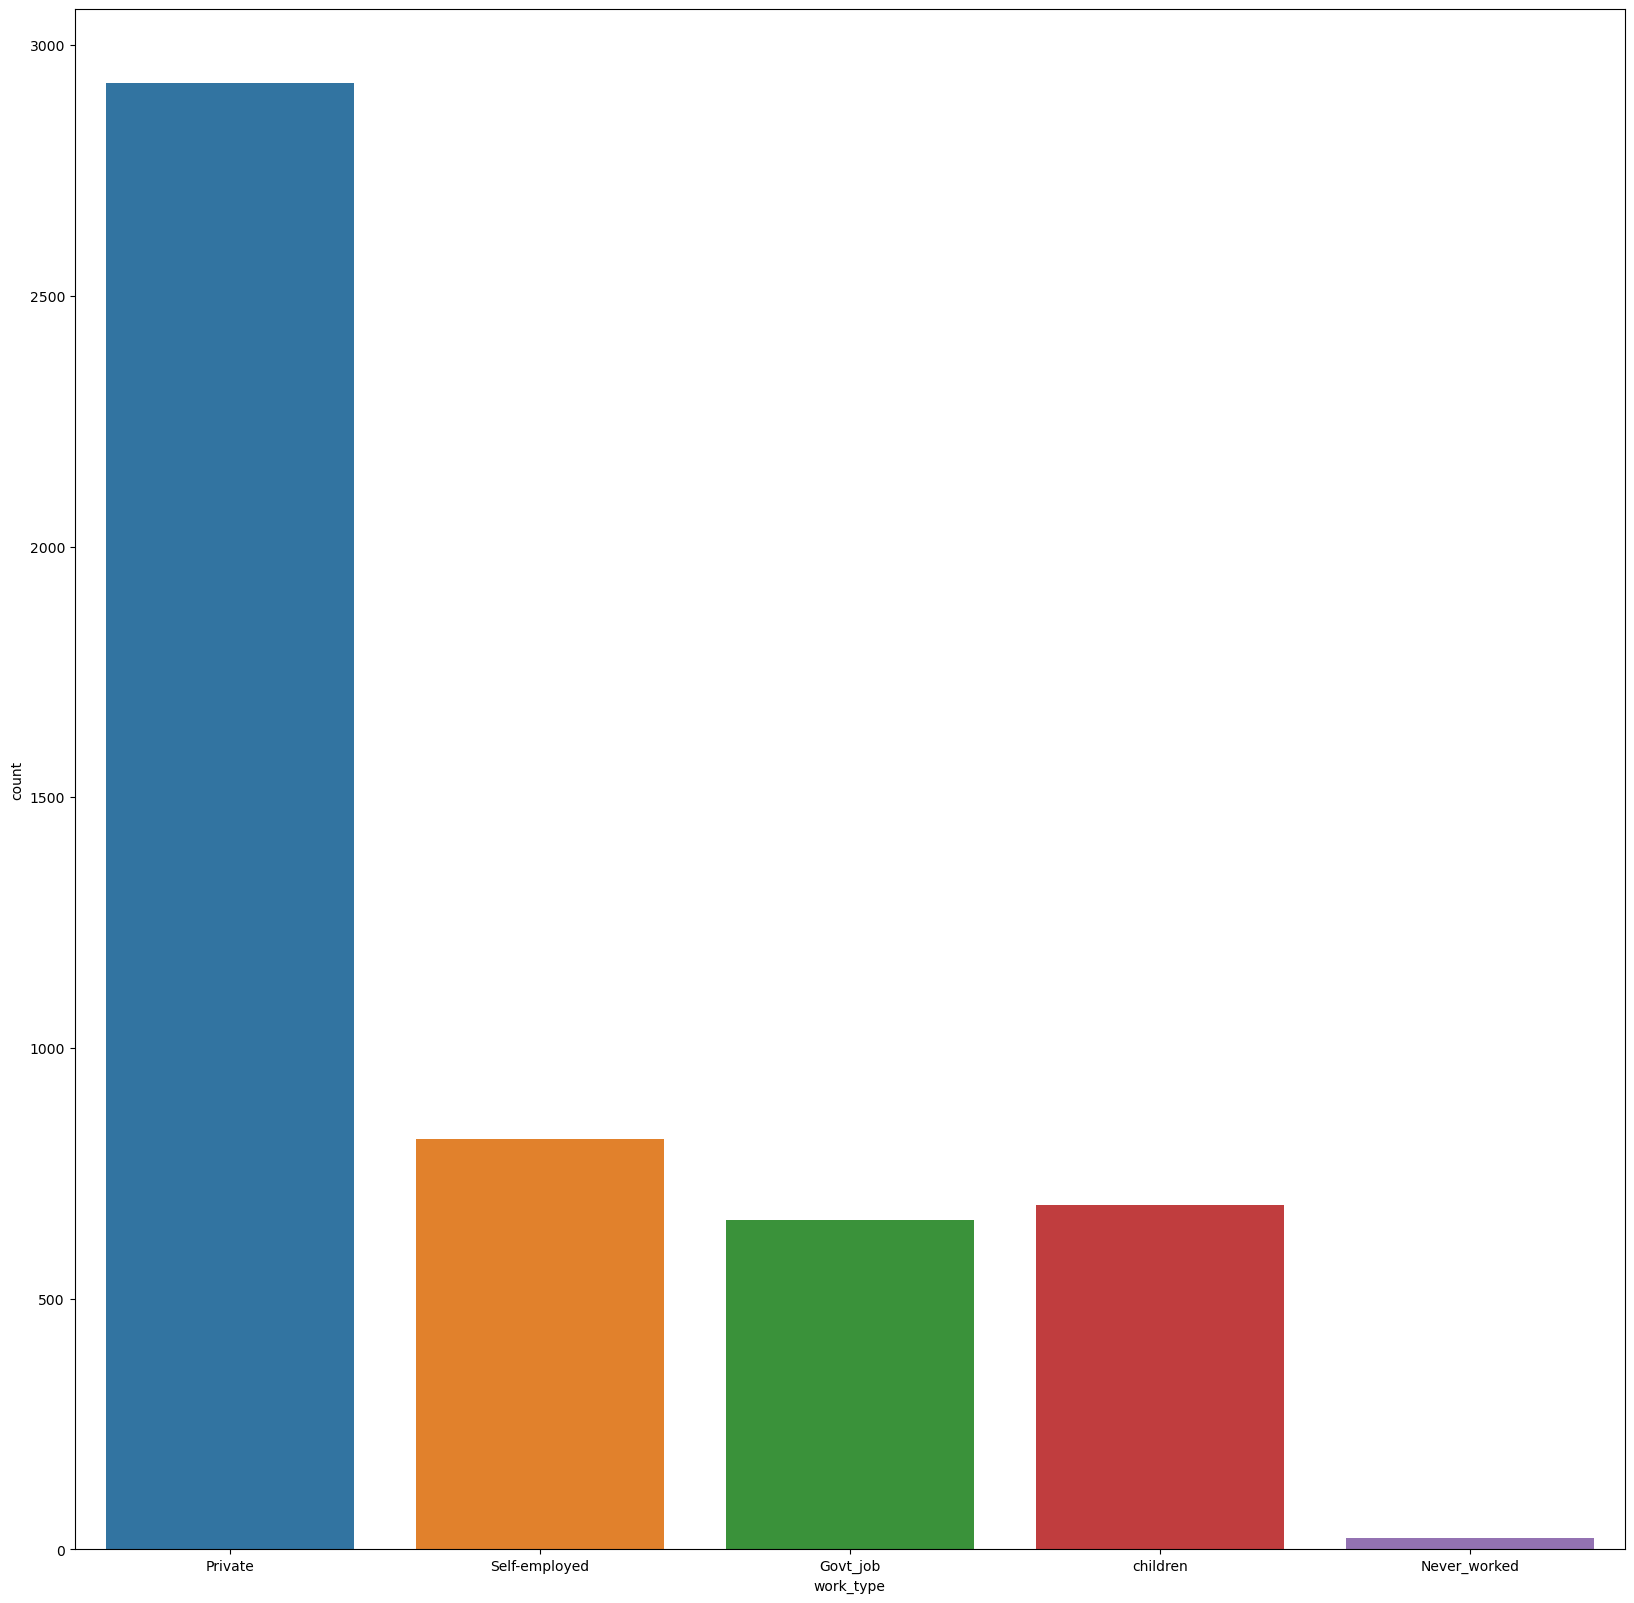

In [19]:
sns.countplot(data=data,x='work_type')
plt.show()


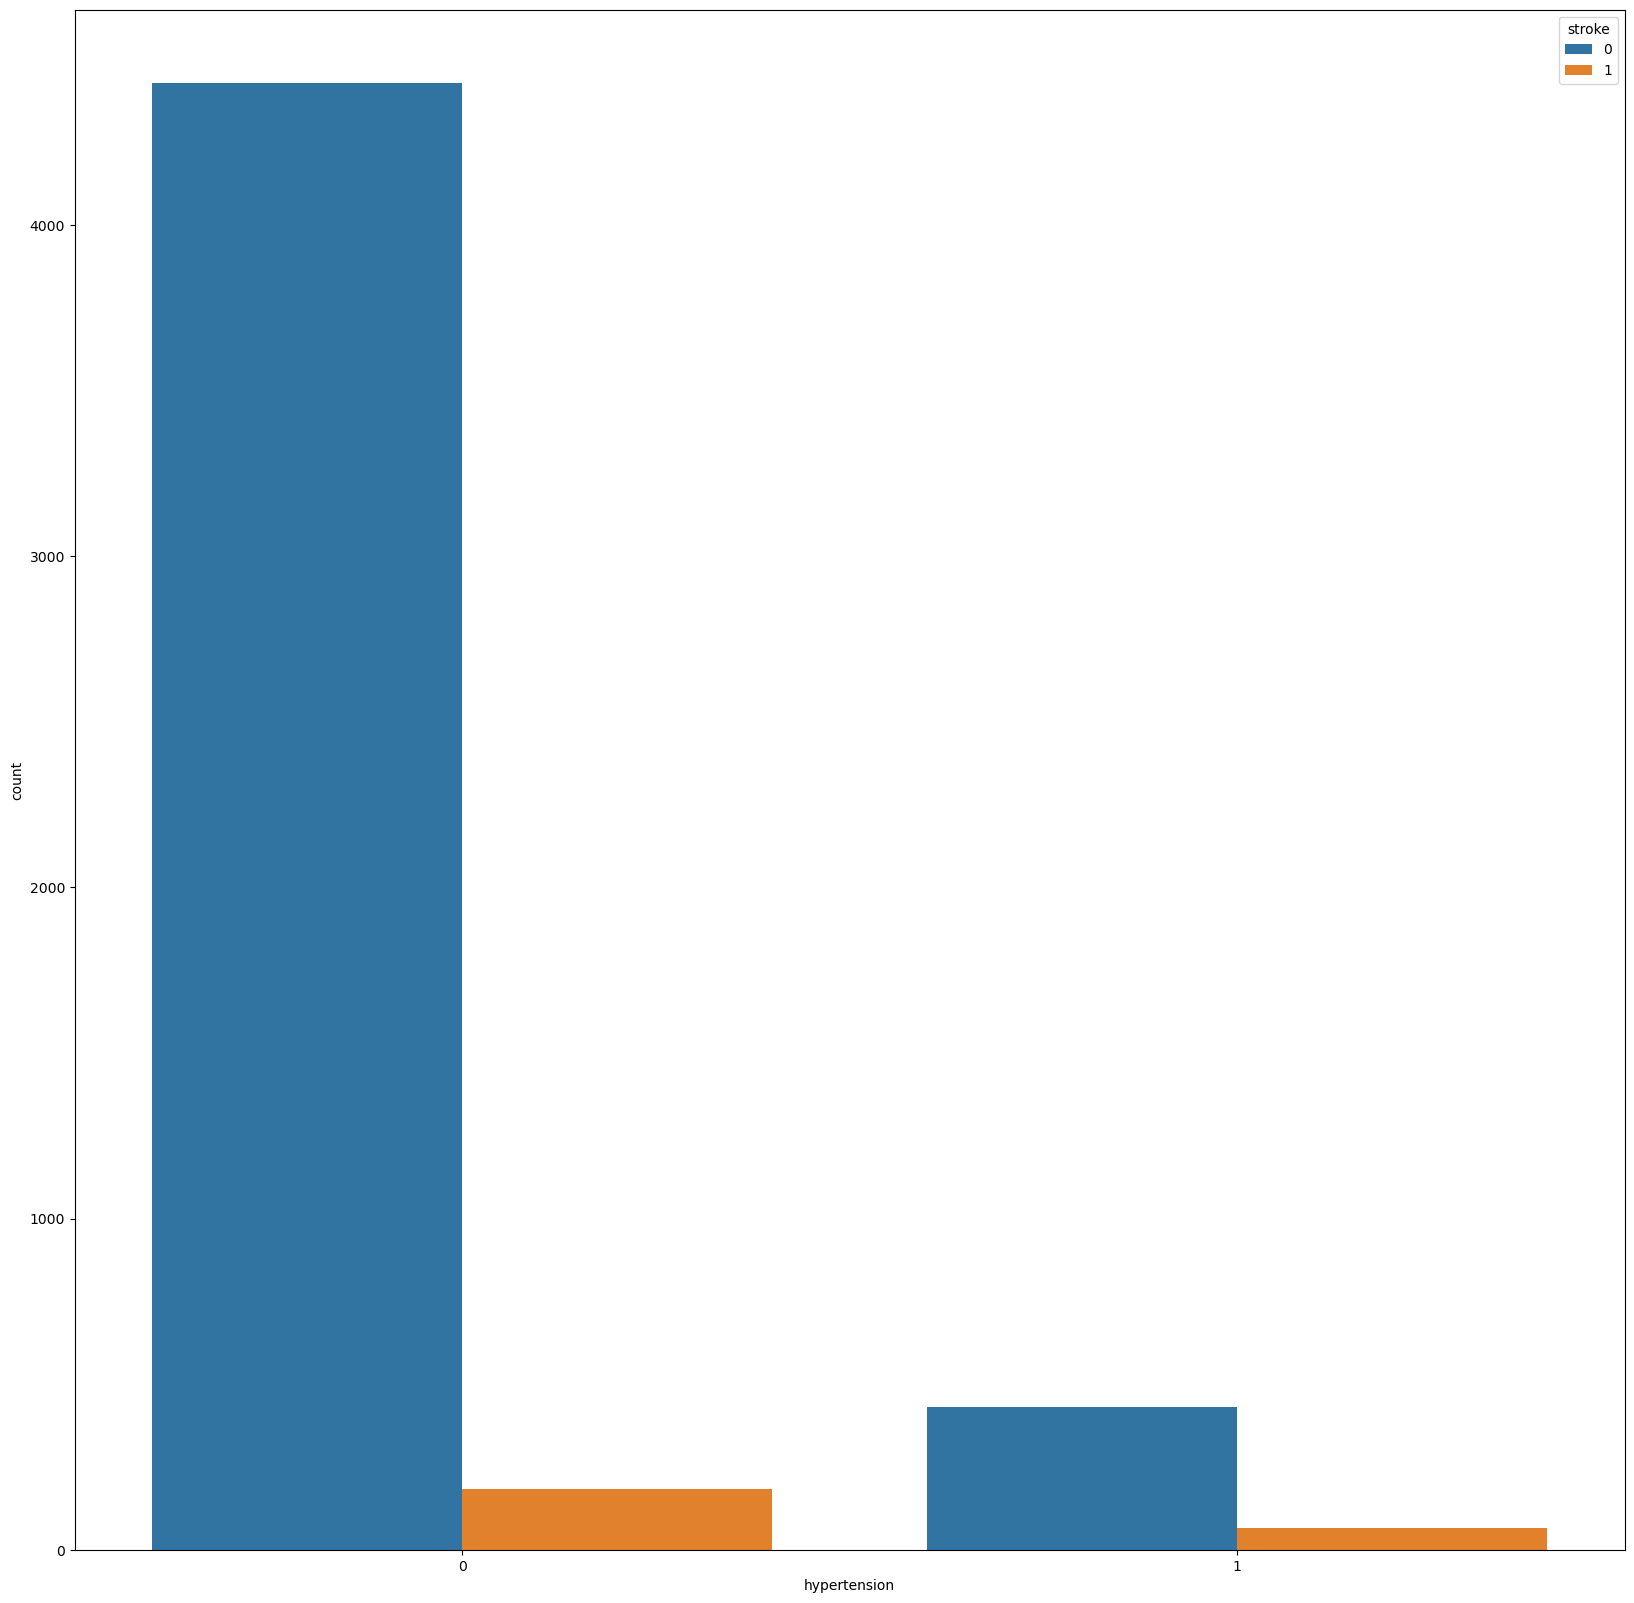

In [20]:
sns.countplot(data=data,x='hypertension',hue='stroke')
plt.show()

In [21]:
data.groupby('hypertension').mean()[['avg_glucose_level', 'stroke']]


,avg_glucose_level,stroke
hypertension,,
0,103.551715,0.039679
1,130.188996,0.132530


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


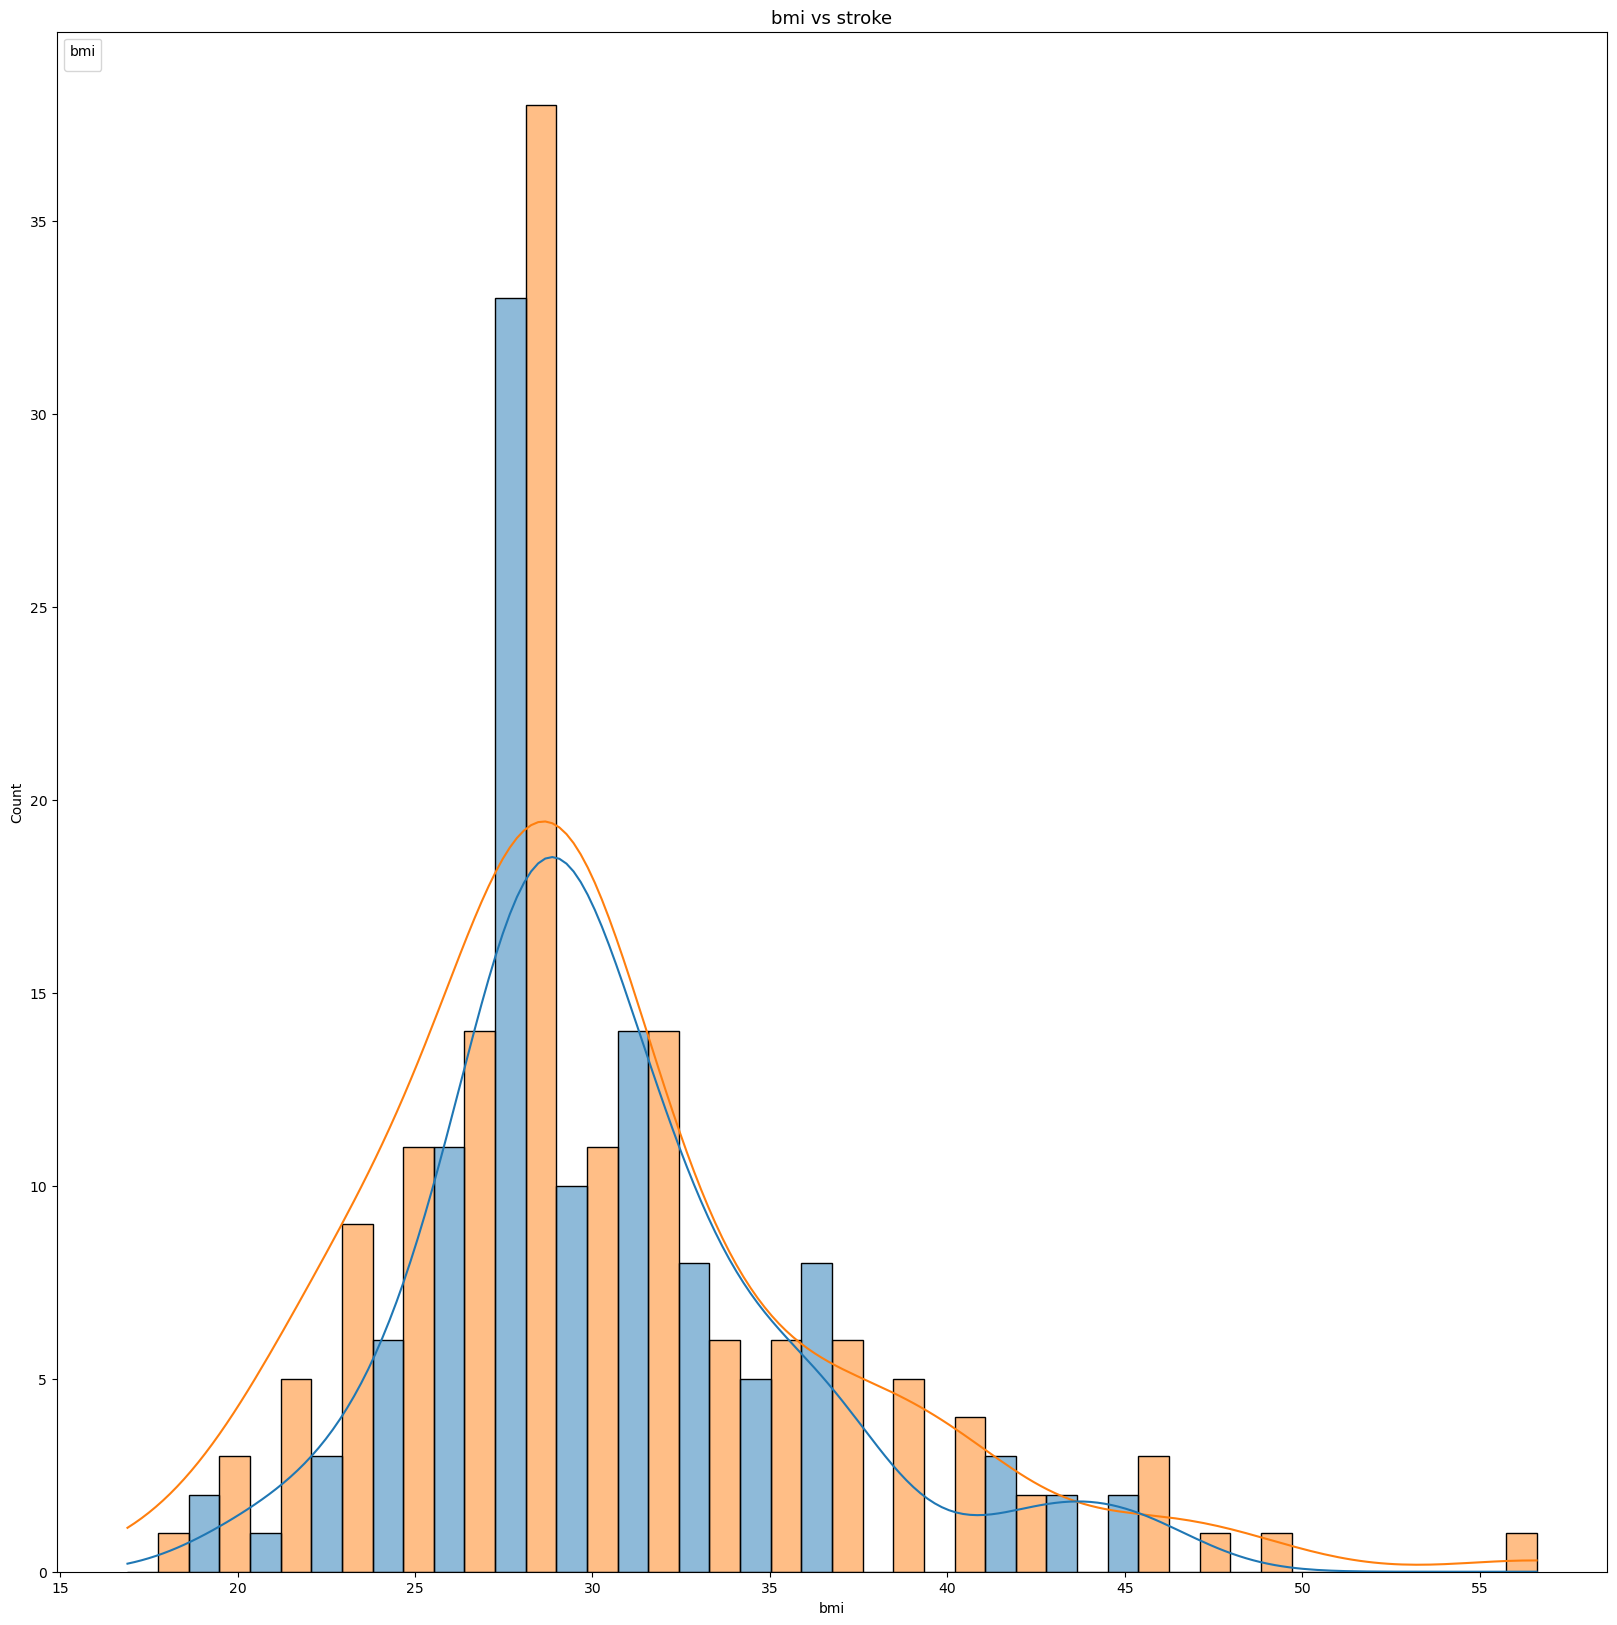

In [22]:
sns.histplot(data=data[data['stroke']==1],x='bmi',hue='gender', stat='count',multiple='dodge',kde=True)
plt.title('bmi vs stroke', fontsize=13)
plt.xlabel('bmi')
plt.ylabel('Count')
# creating a legend object and setting the label for each element.
plt.legend(title='bmi',loc='upper left')
plt.show()

# outlier removal

<Figure size 2000x2000 with 0 Axes>

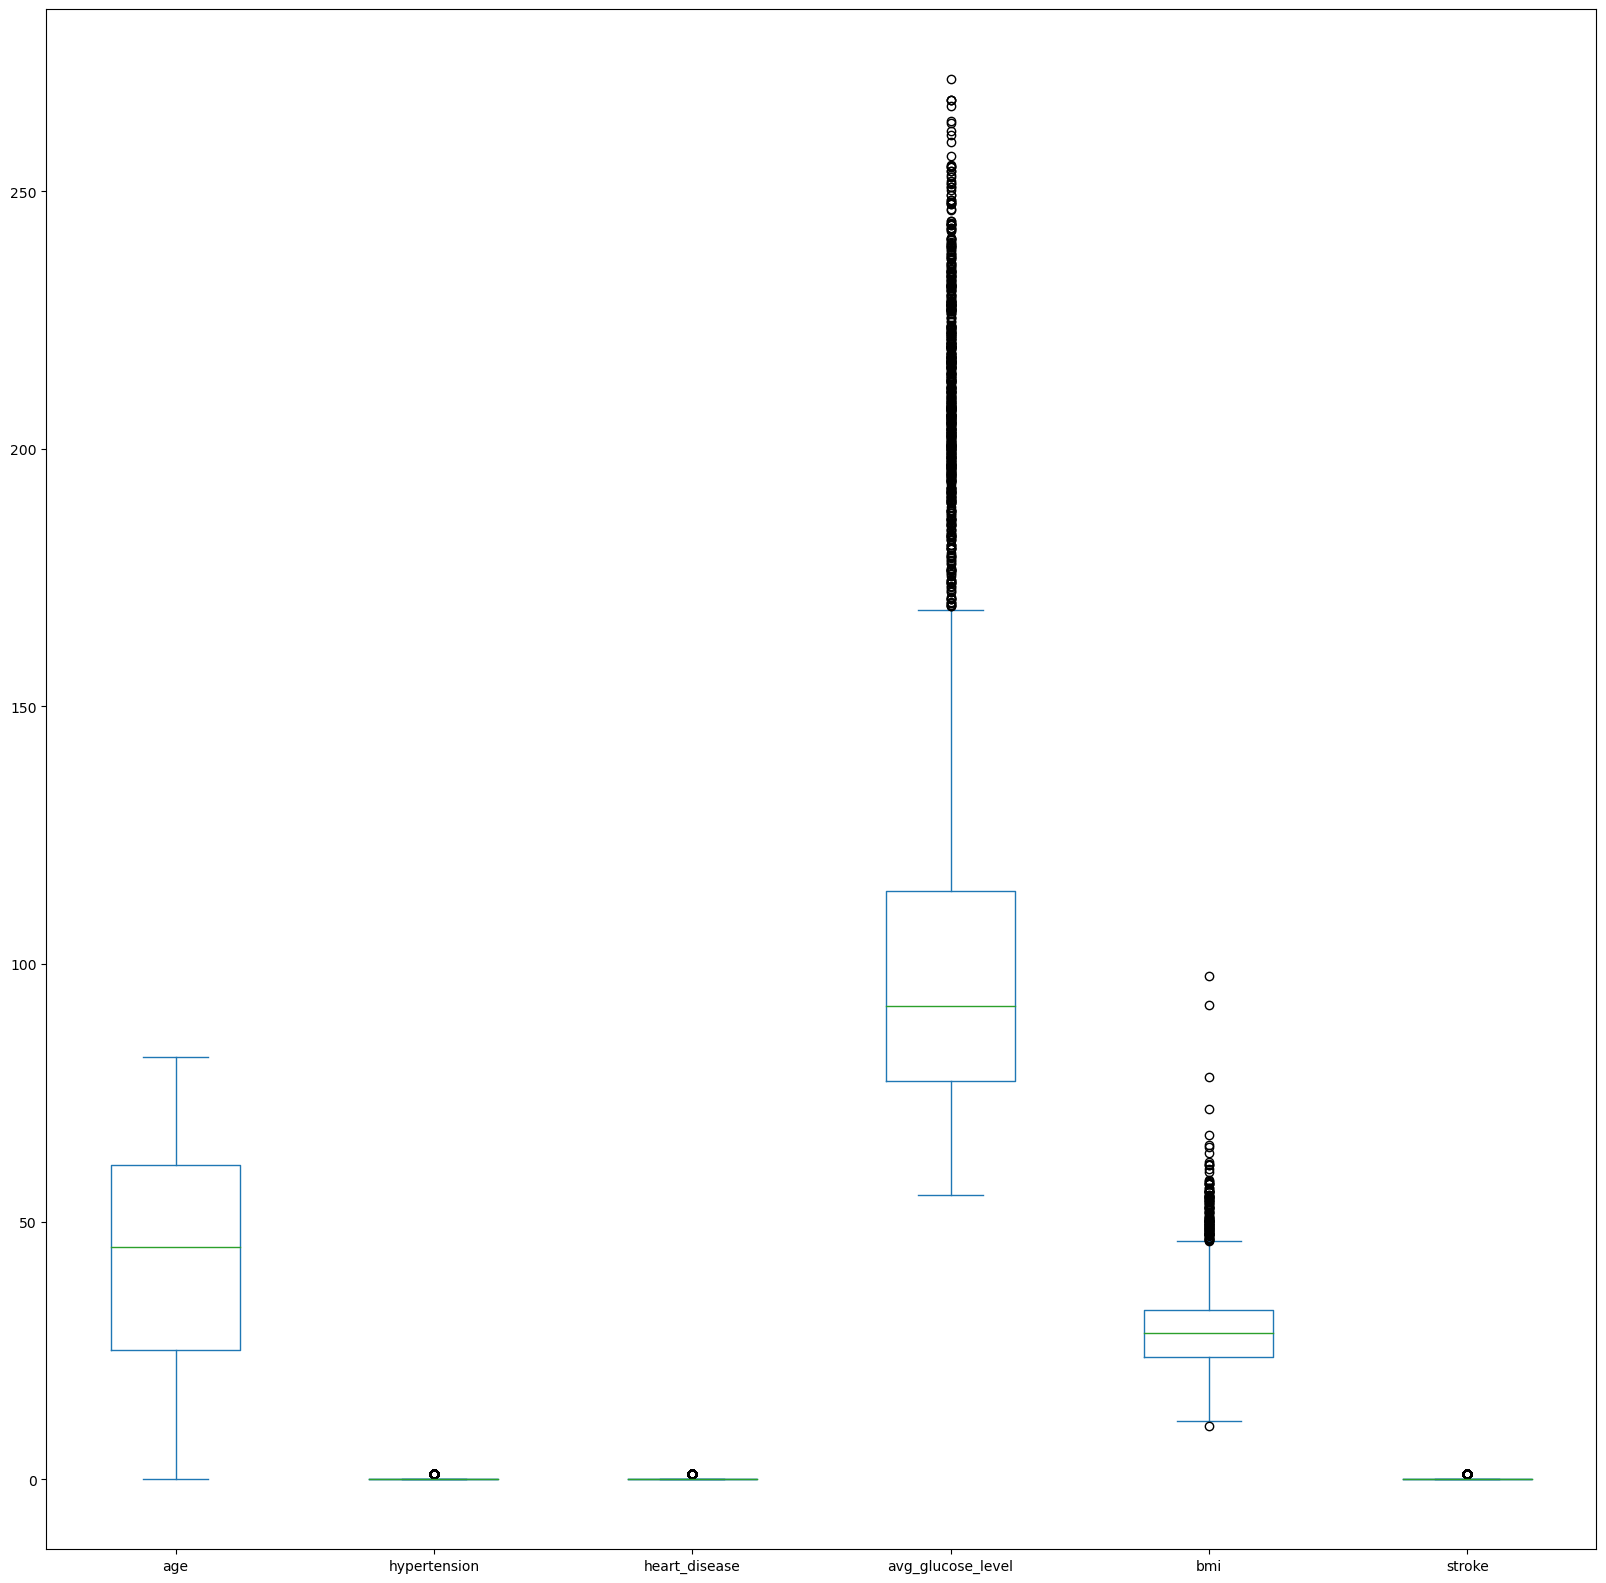

In [23]:
plt.figure(figsize=(20,20))
data.plot(kind='box')
plt.show()

<AxesSubplot:>

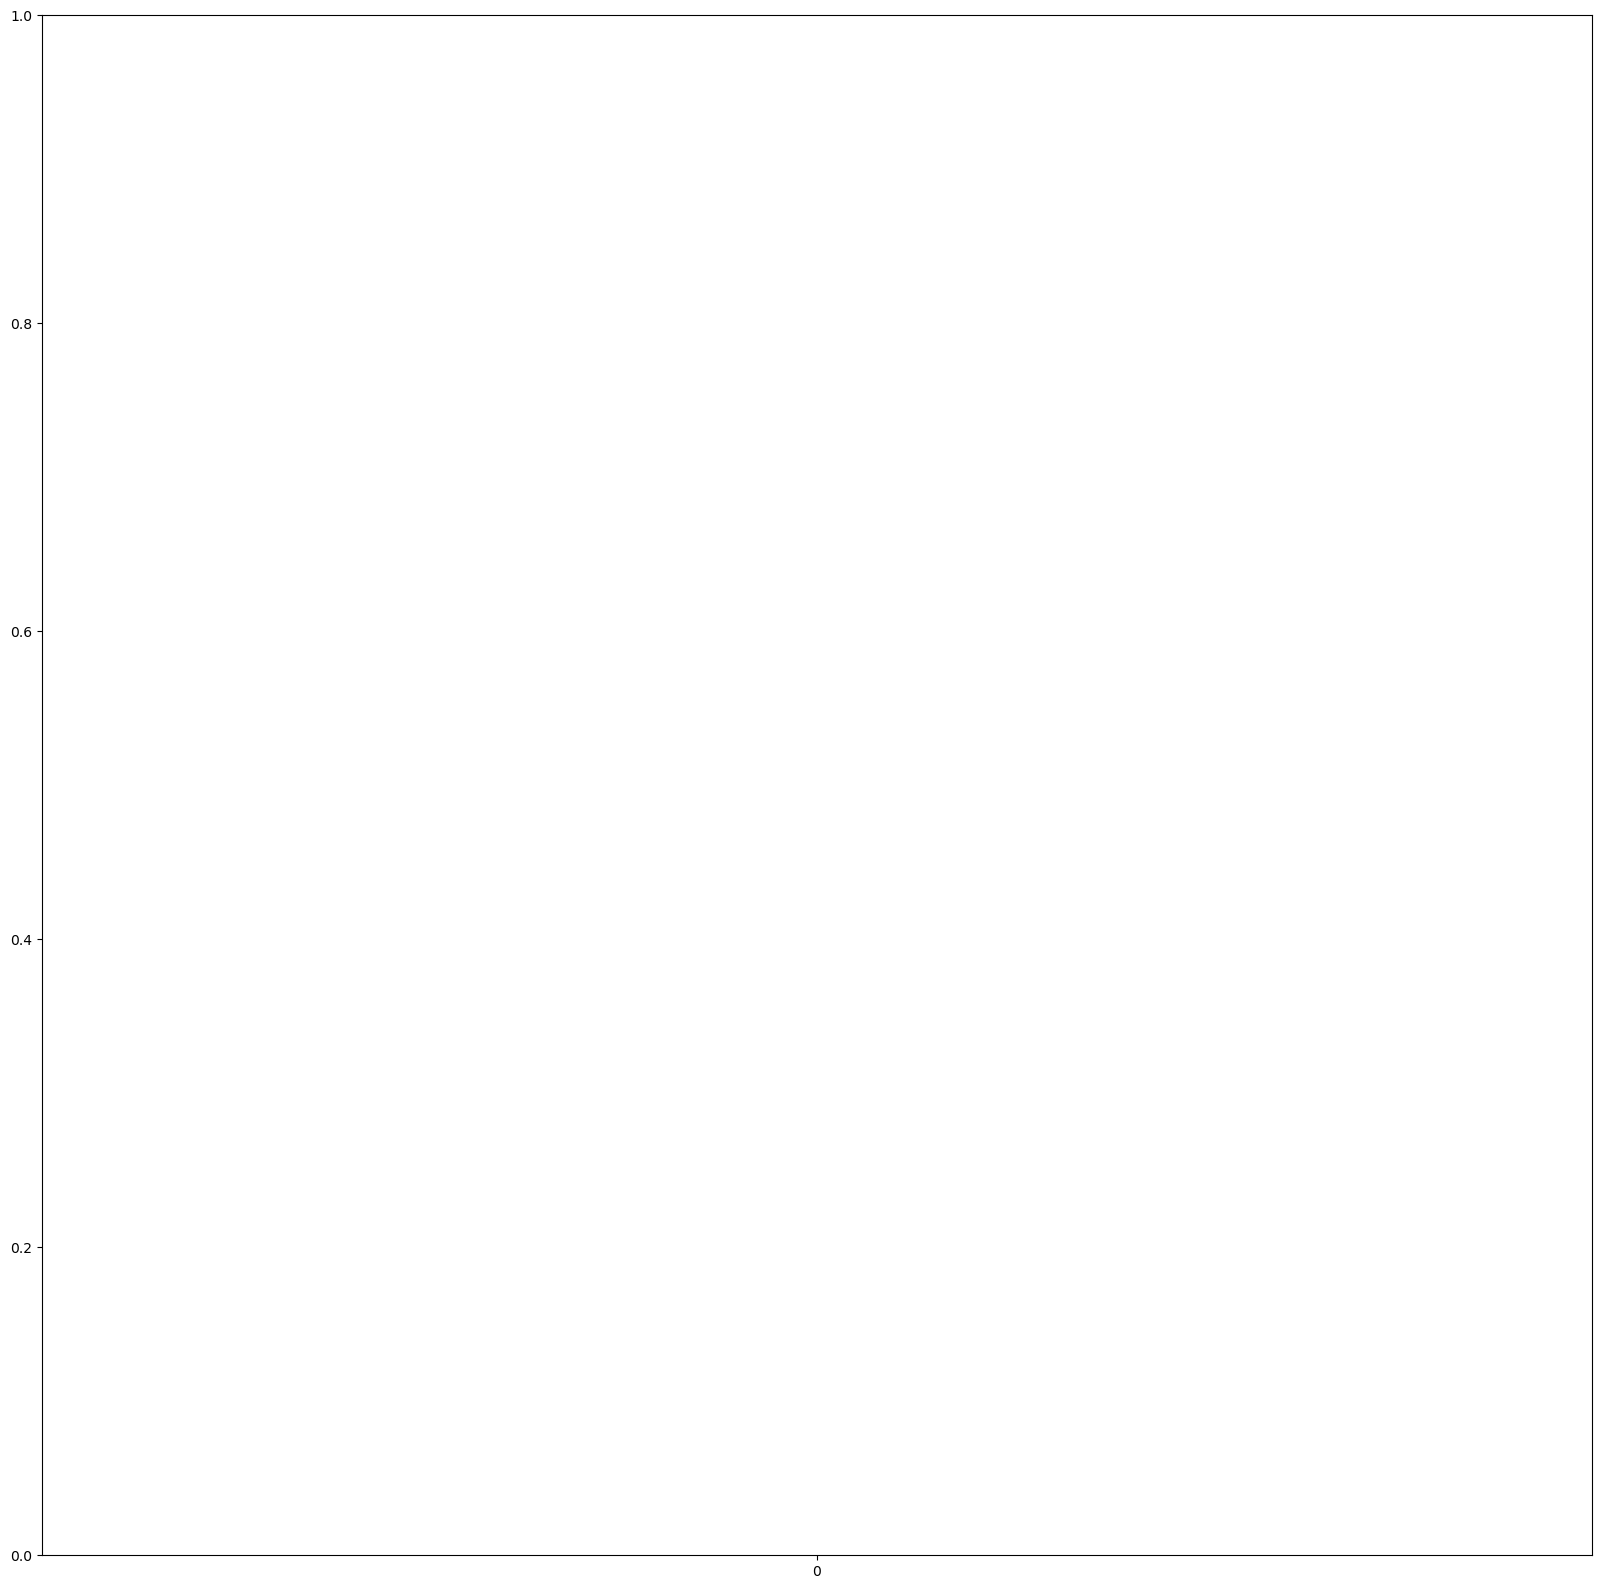

In [24]:
sns.boxplot(Data=data['bmi'])

In [25]:
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

<AxesSubplot:>

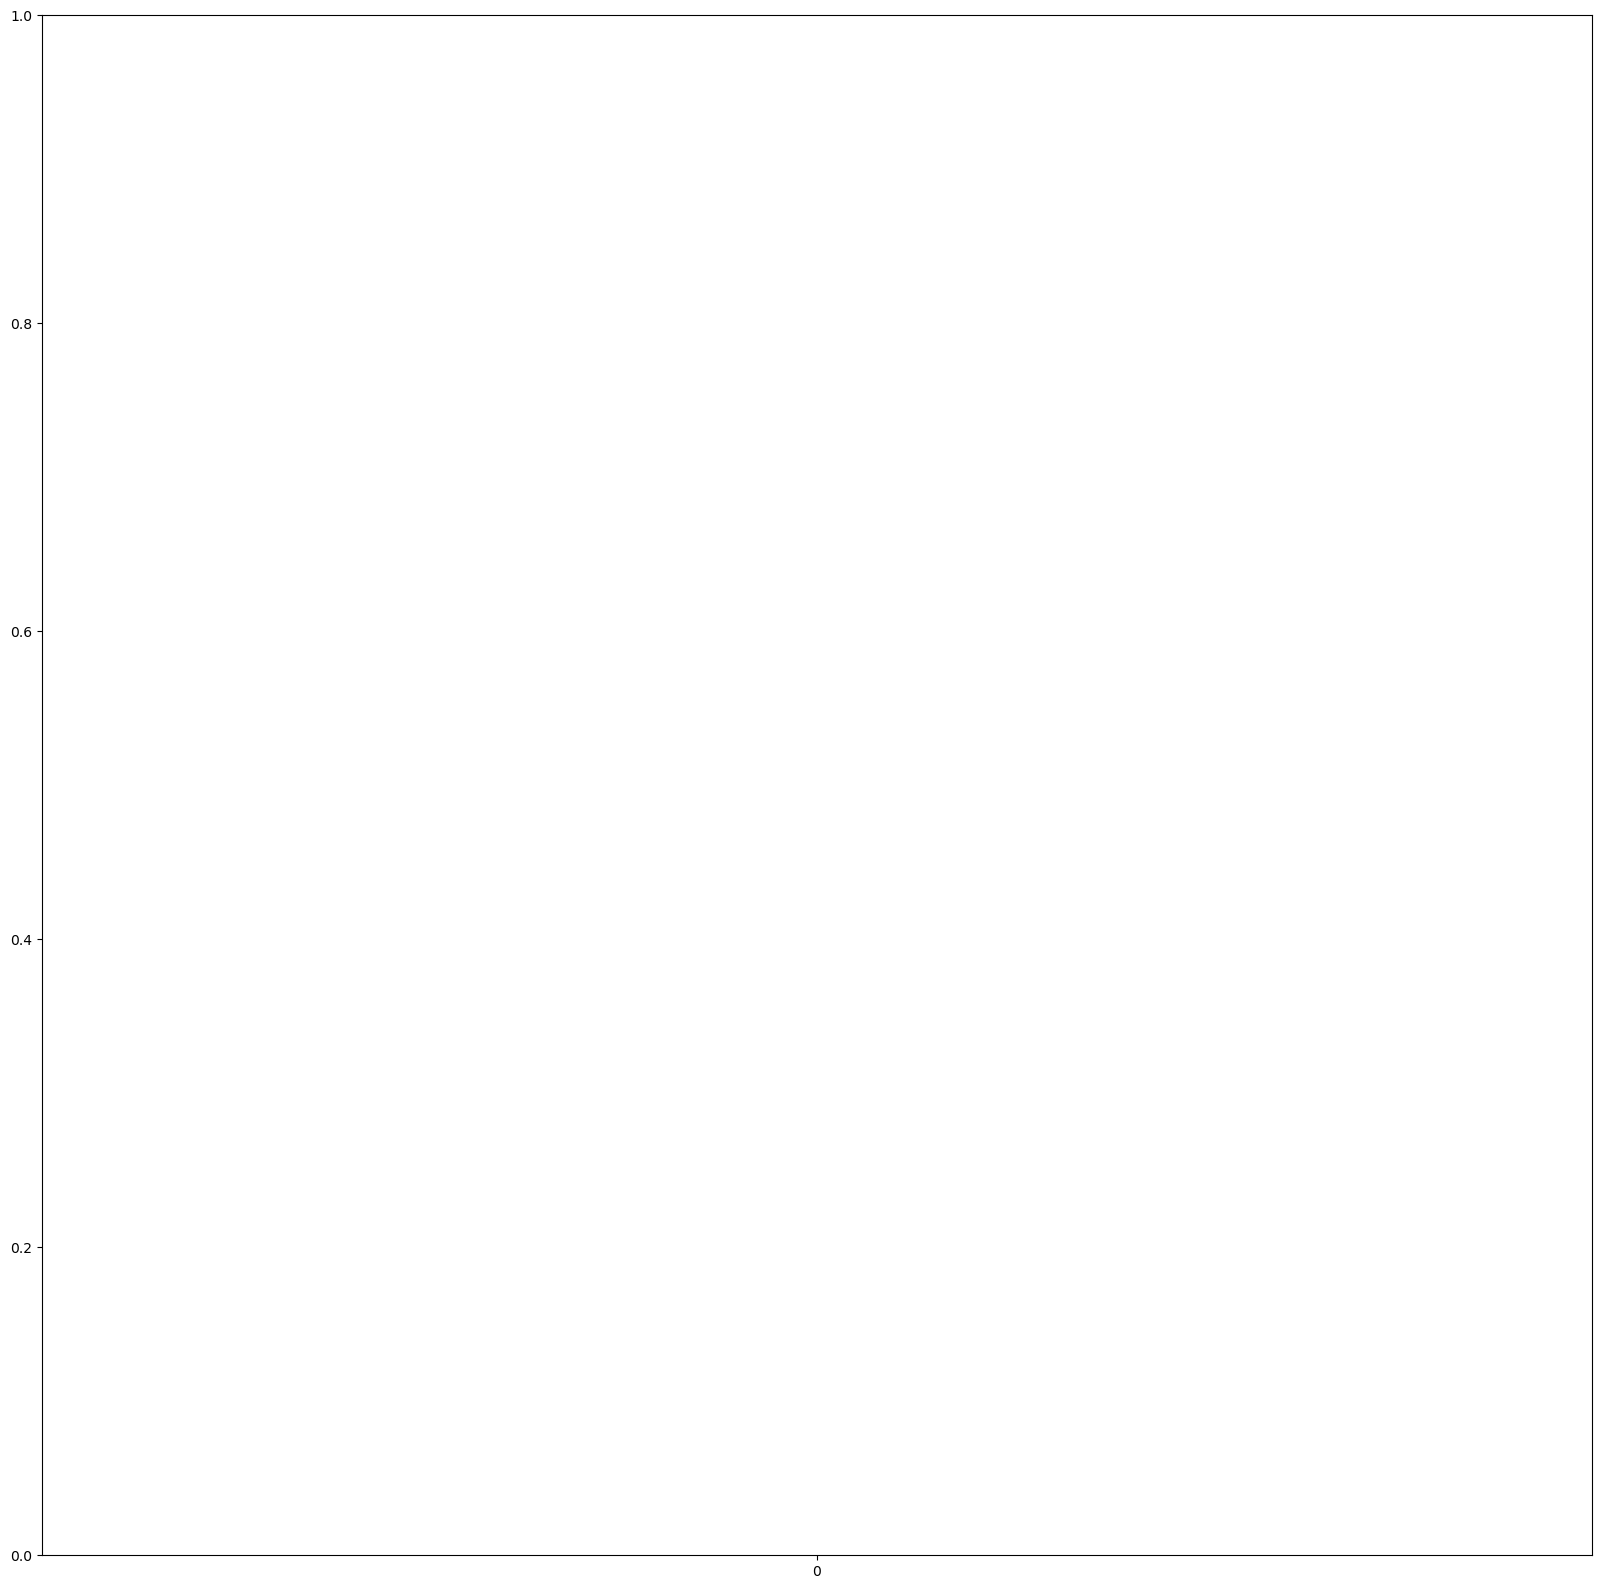

In [26]:
sns.boxplot(Data=data['avg_glucose_level'])

In [27]:
data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [28]:
data.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


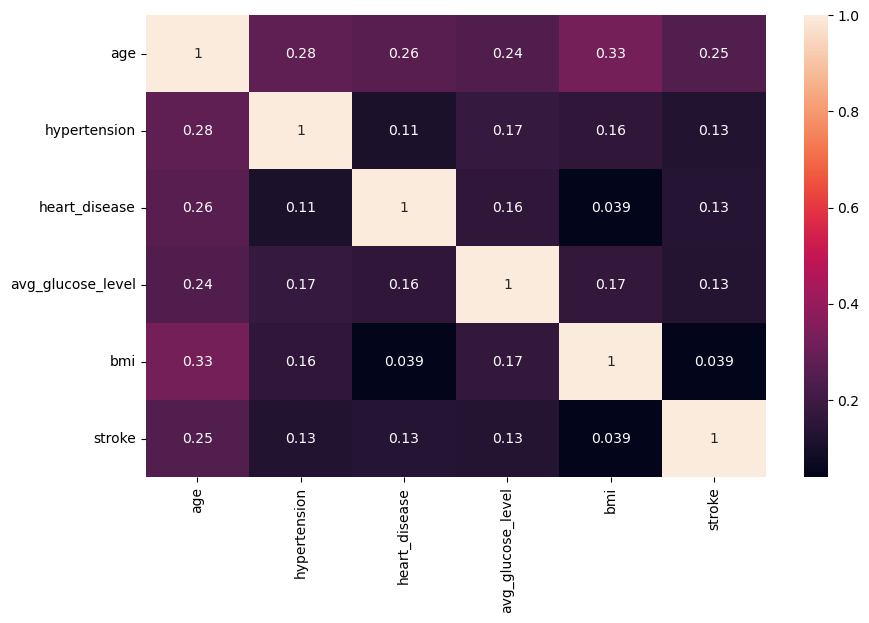

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

# label encoding

In [30]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [31]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [32]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [33]:
gender=enc.fit_transform(data['gender'])
gender

array([1, 0, 1, ..., 0, 1, 0])

In [34]:
smoking_status=enc.fit_transform(data['smoking_status'])
smoking_status

array([1, 2, 2, ..., 2, 1, 0])

In [35]:
work_type=enc.fit_transform(data['work_type'])
work_type

array([2, 3, 2, ..., 3, 2, 0])

In [36]:
Residence_type=enc.fit_transform(data['Residence_type'])
Residence_type

array([1, 0, 0, ..., 0, 0, 1])

In [37]:
ever_married=enc.fit_transform(data['ever_married'])
ever_married

array([1, 1, 1, ..., 1, 1, 1])

In [38]:
data['Residence_type']=Residence_type
data['gender']=gender
data['ever_married']=ever_married
data['work_type']=work_type
data['smoking_status']=smoking_status
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


# separation of target  and independent variable

In [39]:
x=data.drop('stroke', axis=1)
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [40]:
y=data['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

# Normalisation of data

In [41]:
from sklearn.preprocessing import Normalizer
std = Normalizer()
p = std.fit_transform(x)
print(p)

[[0.00414739 0.27787515 0.         ... 0.94846667 0.15179448 0.00414739]
 [0.         0.28610228 0.         ... 0.9484056  0.1355151  0.0093804 ]
 [0.00731541 0.58523241 0.         ... 0.77484771 0.23775067 0.01463081]
 ...
 [0.         0.36765395 0.         ... 0.87176004 0.3214346  0.0210088 ]
 [0.00568735 0.29005507 0.         ... 0.94575016 0.14559627 0.00568735]
 [0.         0.44228101 0.         ... 0.85722101 0.26335824 0.        ]]


In [42]:
from sklearn.preprocessing import Normalizer
std = Normalizer()
x = pd.DataFrame(std.fit_transform(x), columns= x.columns)

In [43]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.004147,0.277875,0.000000,0.004147,0.004147,0.008295,0.004147,0.948467,0.151794,0.004147
1,0.000000,0.286102,0.000000,0.000000,0.004690,0.014071,0.000000,0.948406,0.135515,0.009380
2,0.007315,0.585232,0.000000,0.007315,0.007315,0.014631,0.000000,0.774848,0.237751,0.014631
3,0.000000,0.270067,0.000000,0.000000,0.005512,0.011023,0.005512,0.943748,0.189598,0.016535
4,0.000000,0.409873,0.005188,0.000000,0.005188,0.015565,0.000000,0.903380,0.124518,0.010377
...,...,...,...,...,...,...,...,...,...,...
5105,0.000000,0.669934,0.008374,0.000000,0.008374,0.016748,0.008374,0.701337,0.241957,0.016748
5106,0.000000,0.524483,0.000000,0.000000,0.006475,0.019425,0.006475,0.810682,0.259004,0.012950
5107,0.000000,0.367654,0.000000,0.000000,0.010504,0.031513,0.000000,0.871760,0.321435,0.021009
5108,0.005687,0.290055,0.000000,0.000000,0.005687,0.011375,0.000000,0.945750,0.145596,0.005687


# Splitting of data

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test, y_train,y_test = train_test_split(x, y,random_state=42,
 test_size=0.3,stratify=y)


In [45]:
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2226,0.000000,0.427157,0.0,0.000000,0.008215,0.000000,0.000000,0.885857,0.180720,0.008215
3927,0.000000,0.544444,0.0,0.000000,0.008781,0.017563,0.008781,0.775569,0.318763,0.000000
3358,0.007772,0.629541,0.0,0.007772,0.000000,0.023316,0.000000,0.742159,0.228500,0.000000
4152,0.010402,0.572124,0.0,0.000000,0.010402,0.031207,0.000000,0.765294,0.291263,0.031207
4866,0.000000,0.319243,0.0,0.000000,0.008628,0.017256,0.008628,0.894399,0.311478,0.025885
...,...,...,...,...,...,...,...,...,...,...
1434,0.000000,0.412740,0.0,0.000000,0.009172,0.018344,0.009172,0.851712,0.321937,0.009172
461,0.000000,0.137565,0.0,0.000000,0.000000,0.034391,0.000000,0.975594,0.167657,0.000000
1052,0.000000,0.575798,0.0,0.000000,0.009439,0.018879,0.000000,0.742402,0.341703,0.009439
152,0.000000,0.690046,0.0,0.000000,0.008626,0.025877,0.008626,0.660460,0.294132,0.017251


In [46]:
y_train

2226    0
3927    0
3358    0
4152    0
4866    0
       ..
1434    0
461     0
1052    0
152     1
5052    0
Name: stroke, Length: 3577, dtype: int64

In [47]:
x_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4223,0.000000,0.552779,0.000000,0.000000,0.010630,0.031891,0.000000,0.633783,0.540023,0.000000
2230,0.010873,0.086986,0.000000,0.000000,0.000000,0.043493,0.010873,0.973919,0.204418,0.000000
4612,0.000000,0.267250,0.000000,0.000000,0.000000,0.017817,0.008908,0.936088,0.227163,0.017817
4100,0.000000,0.149359,0.000000,0.000000,0.000000,0.017572,0.000000,0.961084,0.231068,0.017572
2983,0.000000,0.392462,0.000000,0.000000,0.012660,0.025320,0.000000,0.876836,0.275989,0.012660
...,...,...,...,...,...,...,...,...,...,...
1765,0.013750,0.068752,0.000000,0.000000,0.000000,0.055002,0.013750,0.962527,0.255757,0.000000
3103,0.008737,0.576654,0.000000,0.000000,0.008737,0.017474,0.000000,0.776124,0.254252,0.000000
4522,0.007636,0.397062,0.007636,0.000000,0.007636,0.000000,0.000000,0.890487,0.220623,0.022907
624,0.010886,0.707607,0.000000,0.010886,0.010886,0.032659,0.010886,0.635431,0.304815,0.032659


In [48]:
y_test

4223    0
2230    0
4612    0
4100    0
2983    0
       ..
1765    0
3103    0
4522    0
624     0
1645    0
Name: stroke, Length: 1533, dtype: int64

# KNN Classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)#hyperparameter k = 5
knn.fit(x_train,y_train)#training of the model

KNeighborsClassifier(n_neighbors=100)

In [50]:
y_pred = knn.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred)
print('The accuracy score of kn is: ',acc1)

The accuracy score of kn is:  0.9510763209393346


In [52]:
y_pred1 = knn.predict(x_train)

In [53]:
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(y_train, y_pred1)
print('The accuracy score of kn is: ',acc2)

The accuracy score of kn is:  0.9513558848196813


# KNN Regressor

In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [55]:
knn = KNeighborsRegressor()

In [56]:
Grid_param = {'n_neighbors':range(1,20),'weights':['uniform', 'distance'],
 'metric':['minkowski','eculidean','manhanttan','hamming'],
 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

In [57]:
grid_search = GridSearchCV(knn,Grid_param,n_jobs=-1,cv=10,scoring='neg_mean_squared_error')
grid_search.fit(x_train,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3420 fits failed out of a total of 6080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
618 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ASUS\anaconda3\lib\site-packages\

GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'eculidean', 'manhanttan',
                                    'hamming'],
                         'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [58]:
grid_search.best_params_

{'algorithm': 'auto',
 'metric': 'minkowski',
 'n_neighbors': 19,
 'weights': 'uniform'}

In [59]:
grid_search.best_estimator_

KNeighborsRegressor(n_neighbors=19)

In [60]:
kn = KNeighborsRegressor(n_neighbors=100,metric='minkowski',algorithm='brute',
 weights='uniform')
kn.fit(x_train,y_train)
pred1 = kn.predict(x_train)
np.sqrt(mean_squared_error(pred1,y_train))

0.20625242181379028

In [61]:
kn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='brute', n_neighbors=100)

In [62]:
pred1 = kn.predict(x_train)
np.sqrt(mean_squared_error(pred1,y_train))

0.20625242181379028

In [63]:
pred2 = kn.predict(x_test)
np.sqrt(mean_squared_error(pred2,y_test))

0.21006708461617432

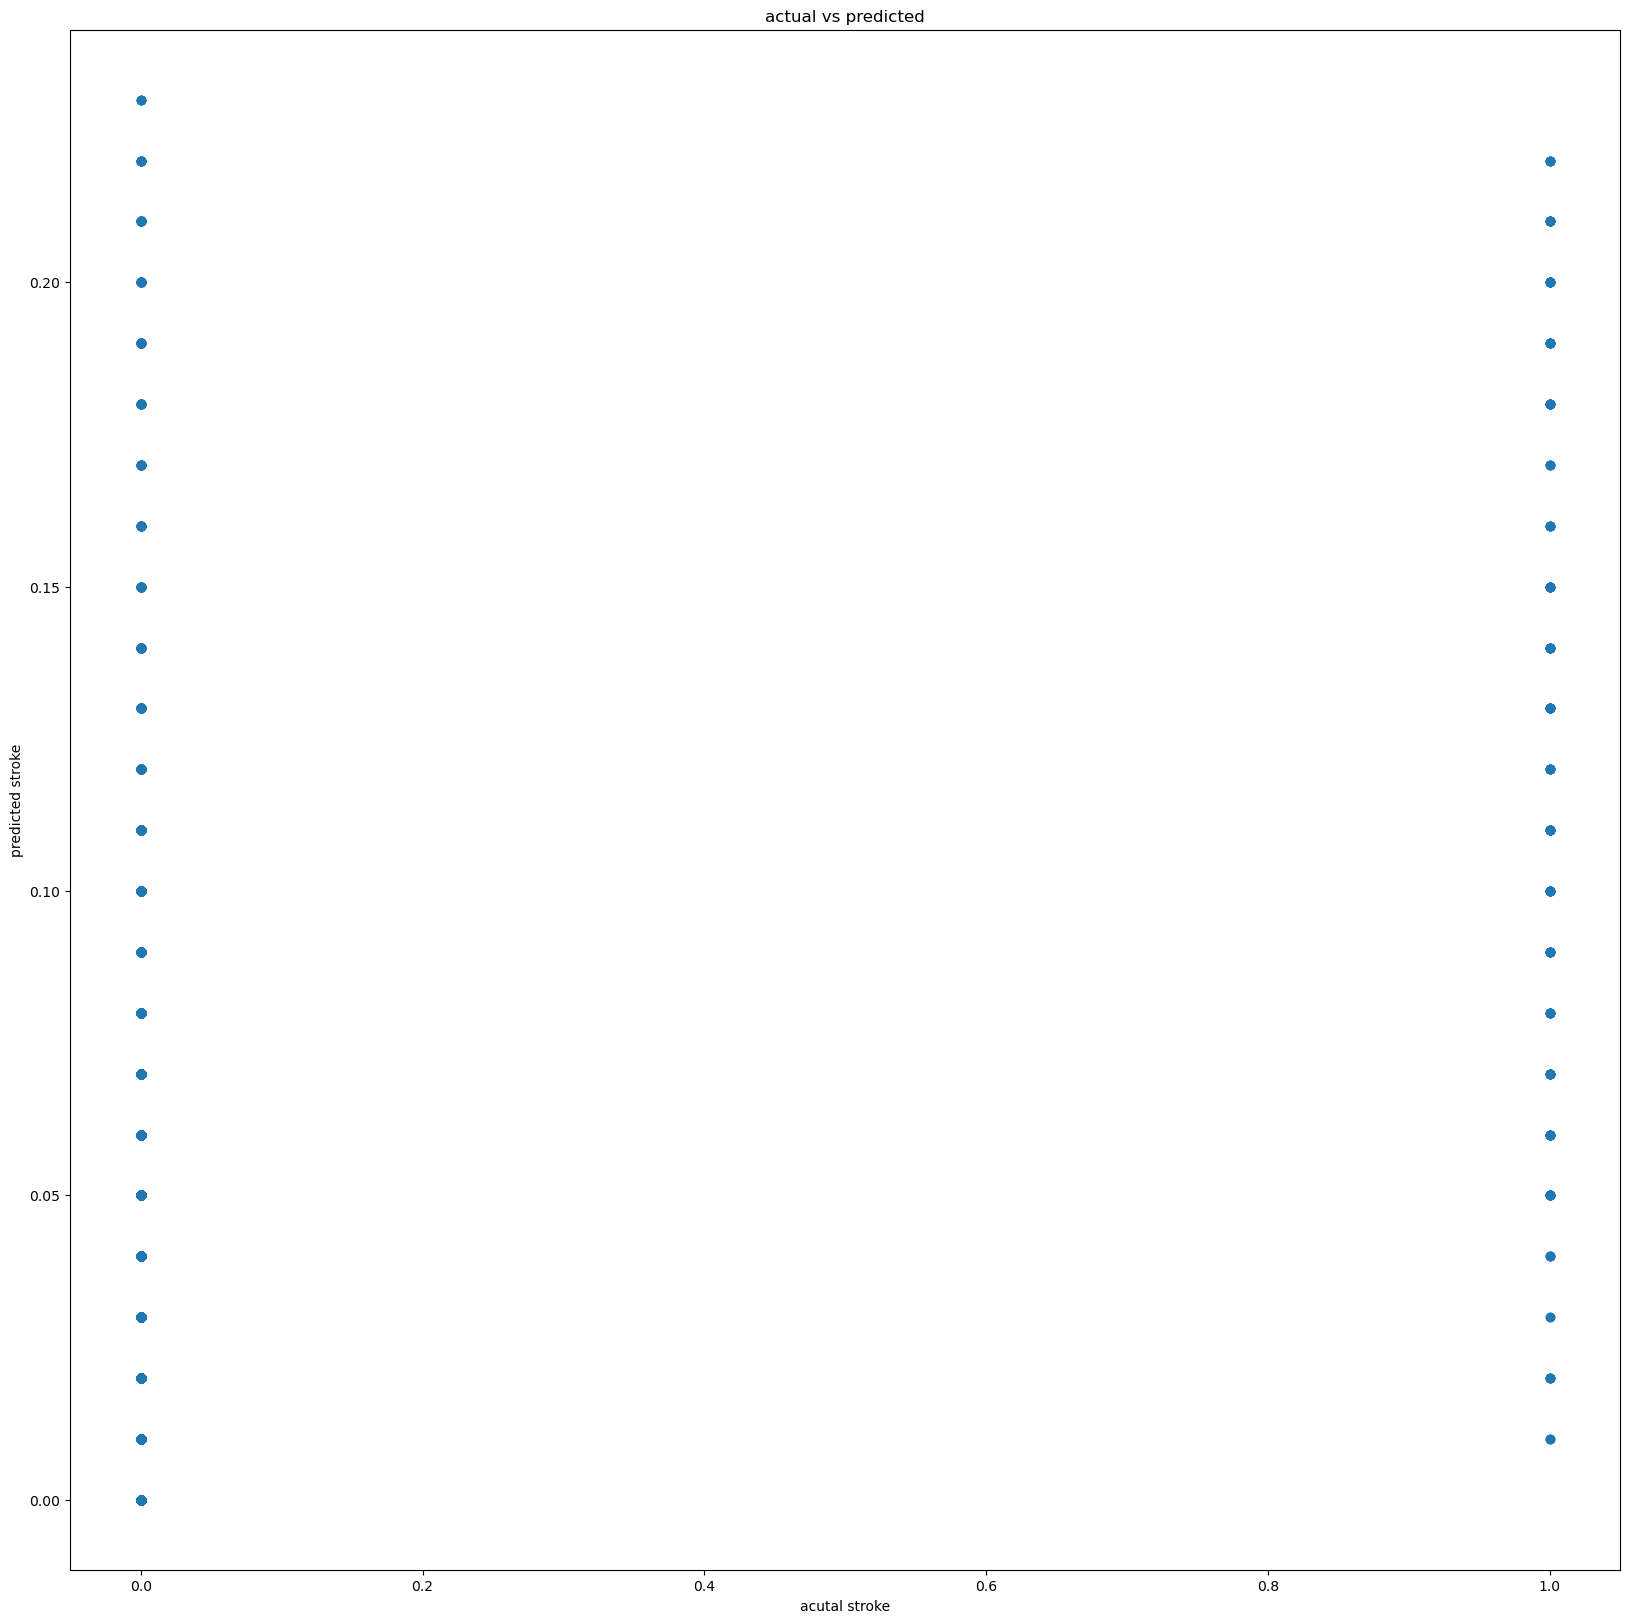

In [64]:
plt.scatter(y_train, pred1)
plt.xlabel('acutal stroke')
plt.ylabel('predicted stroke')
plt.title('actual vs predicted')
plt.show()

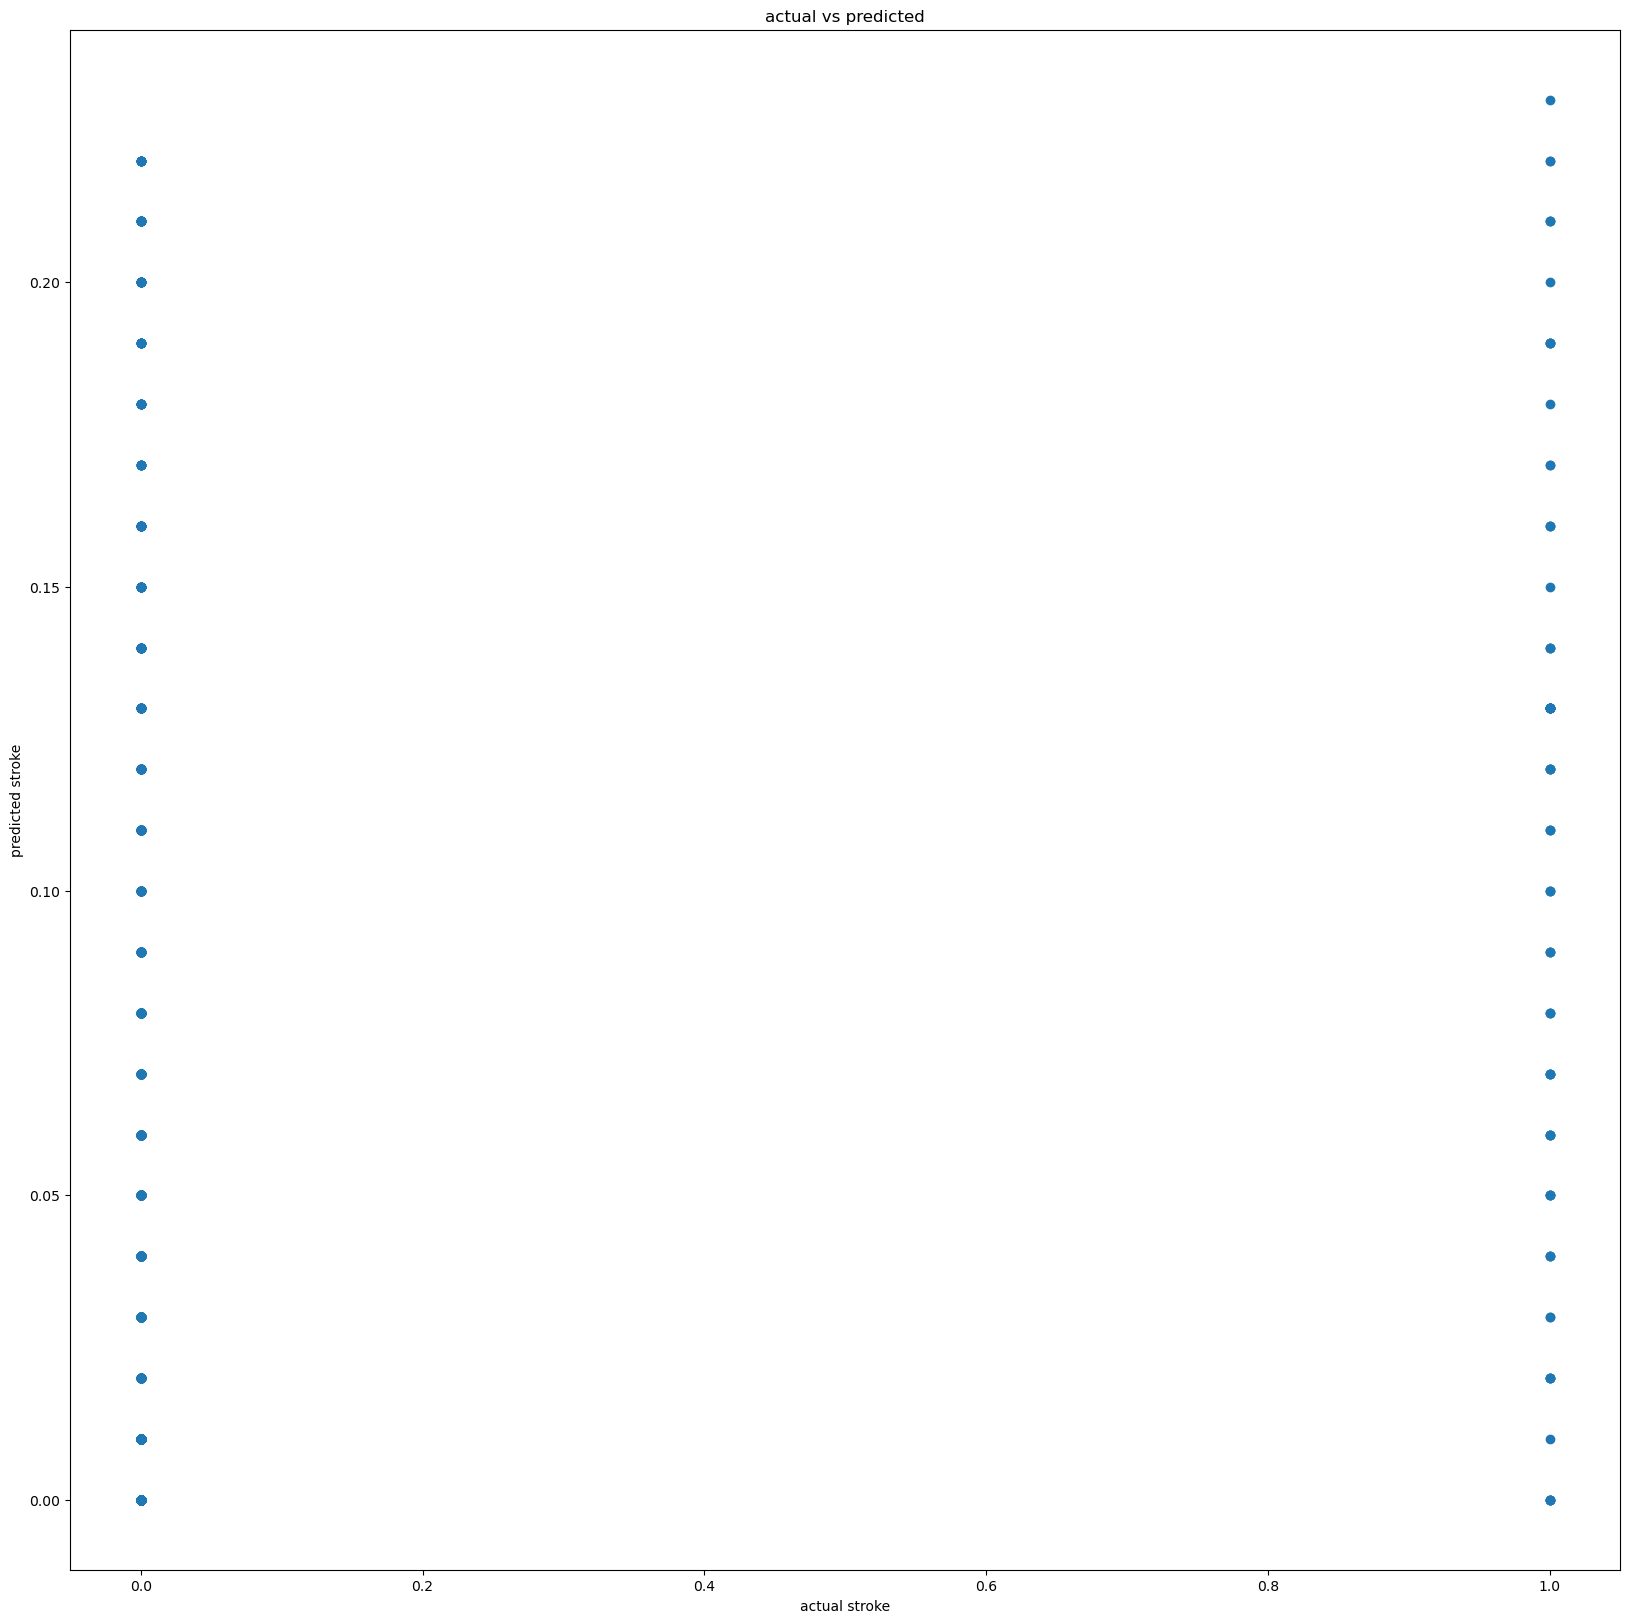

In [65]:
plt.scatter(y_test, pred2)
plt.xlabel('actual stroke')
plt.ylabel('predicted stroke')
plt.title('actual vs predicted')
plt.show()

In [66]:
from sklearn.metrics import r2_score
r2_score(y_test,pred2)

0.05162185185185175

In [67]:
r2_score(y_train,pred1)

0.08076871556875076

In [68]:
rmse_error = []
for k in range(1,50):
 model = KNeighborsRegressor(n_neighbors=k)
 model.fit(x_train,y_train)
 predx = model.predict(x_test)
 error = np.sqrt(mean_squared_error(y_test,predx))
 rmse_error.append(error)
 print('Error value for K is: ', k, error)

Error value for K is:  1 0.2989435628188294
Error value for K is:  2 0.2531600670909052
Error value for K is:  3 0.23608632820833012
Error value for K is:  4 0.23399519400063465
Error value for K is:  5 0.22838381080076006
Error value for K is:  6 0.2231444226394135
Error value for K is:  7 0.22181804016132686
Error value for K is:  8 0.22063331721515234
Error value for K is:  9 0.21860504685305804
Error value for K is:  10 0.21647716134250589
Error value for K is:  11 0.2170163976168564
Error value for K is:  12 0.21677034333518902
Error value for K is:  13 0.21666465507835342
Error value for K is:  14 0.2162953631482662
Error value for K is:  15 0.21505960614638836
Error value for K is:  16 0.21441308184744462
Error value for K is:  17 0.214061575141464
Error value for K is:  18 0.21391292579614438
Error value for K is:  19 0.21393200939656457
Error value for K is:  20 0.21382424762288724
Error value for K is:  21 0.21344450866376216
Error value for K is:  22 0.2130362925591579
Error

<AxesSubplot:>

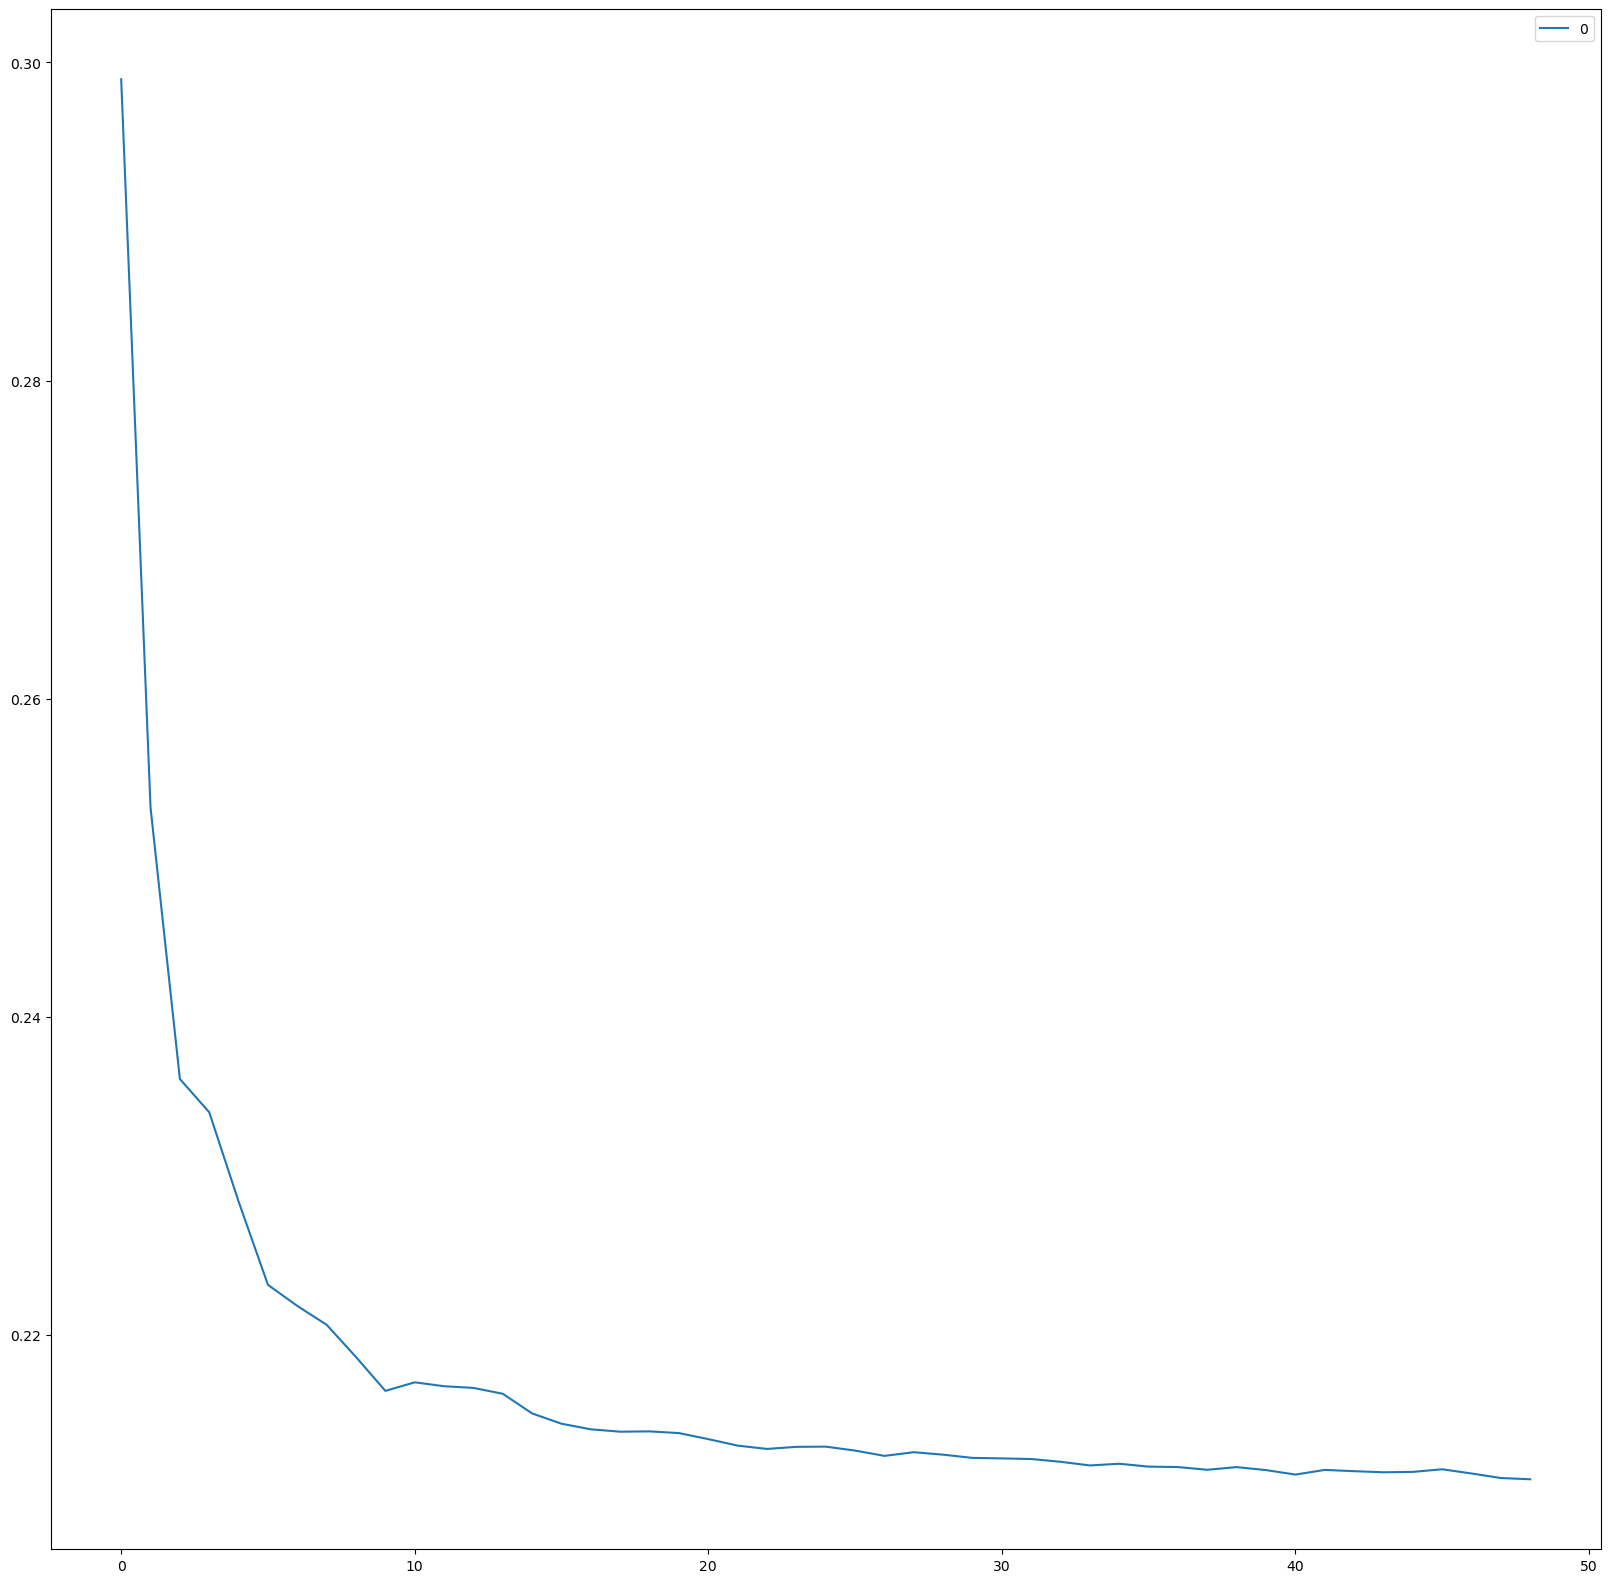

In [69]:
plot1 = pd.DataFrame(rmse_error)
plot1.plot()

# Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [71]:
from sklearn.metrics import mean_squared_error

In [72]:
pred1 = LR.predict(x_train)
erro_score_train = np.sqrt(mean_squared_error(y_train,pred1))
print('The mean squared error is: ',erro_score_train)

The mean squared error is:  0.20829888246631353


In [73]:
pred2 = LR.predict(x_test)
erro_score_test = np.sqrt(mean_squared_error(y_test,pred2))
print('The mean squared error is: ',erro_score_test)

The mean squared error is:  0.21090520858646347


In [74]:
x_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2226,0.000000,0.427157,0.0,0.000000,0.008215,0.000000,0.000000,0.885857,0.180720,0.008215
3927,0.000000,0.544444,0.0,0.000000,0.008781,0.017563,0.008781,0.775569,0.318763,0.000000
3358,0.007772,0.629541,0.0,0.007772,0.000000,0.023316,0.000000,0.742159,0.228500,0.000000
4152,0.010402,0.572124,0.0,0.000000,0.010402,0.031207,0.000000,0.765294,0.291263,0.031207
4866,0.000000,0.319243,0.0,0.000000,0.008628,0.017256,0.008628,0.894399,0.311478,0.025885


In [75]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfa

In [76]:
linear1 = LinearRegression()
sfa1 = sfa(linear1, k_features = 4, forward = False, verbose = 1, scoring='neg_mean_squared_error')

In [77]:
sfa_fit = sfa1.fit(x,y)

Features: 4/4

In [78]:
feature_names = list(sfa_fit.k_feature_names_)
print(feature_names)

['gender', 'ever_married', 'Residence_type', 'smoking_status']


In [79]:
x1 = x[feature_names]
x1.head()

,gender,ever_married,Residence_type,smoking_status
0,0.004147,0.004147,0.004147,0.004147
1,0.000000,0.004690,0.000000,0.009380
2,0.007315,0.007315,0.000000,0.014631
3,0.000000,0.005512,0.005512,0.016535
4,0.000000,0.005188,0.000000,0.010377


In [80]:
x1.shape

(5110, 4)

In [81]:
LR.fit(x_train,y_train)

LinearRegression()

In [82]:
pred1 = LR.predict(x_train)
error_score_train = np.sqrt(mean_squared_error(y_train,pred1))
print(error_score_train)

0.20829888246631353


In [83]:
pred2 = LR.predict(x_test)
error_score_test = np.sqrt(mean_squared_error(y_test,pred2))
print(error_score_test)

0.21090520858646347


# SelectKBest and Chi2

In [84]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [85]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.004147,0.277875,0.000000,0.004147,0.004147,0.008295,0.004147,0.948467,0.151794,0.004147
1,0.000000,0.286102,0.000000,0.000000,0.004690,0.014071,0.000000,0.948406,0.135515,0.009380
2,0.007315,0.585232,0.000000,0.007315,0.007315,0.014631,0.000000,0.774848,0.237751,0.014631
3,0.000000,0.270067,0.000000,0.000000,0.005512,0.011023,0.005512,0.943748,0.189598,0.016535
4,0.000000,0.409873,0.005188,0.000000,0.005188,0.015565,0.000000,0.903380,0.124518,0.010377
...,...,...,...,...,...,...,...,...,...,...
5105,0.000000,0.669934,0.008374,0.000000,0.008374,0.016748,0.008374,0.701337,0.241957,0.016748
5106,0.000000,0.524483,0.000000,0.000000,0.006475,0.019425,0.006475,0.810682,0.259004,0.012950
5107,0.000000,0.367654,0.000000,0.000000,0.010504,0.031513,0.000000,0.871760,0.321435,0.021009
5108,0.005687,0.290055,0.000000,0.000000,0.005687,0.011375,0.000000,0.945750,0.145596,0.005687


In [86]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

# spllitng data

In [87]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
802,0.007115,0.562096,0.00000,0.0,0.007115,0.021345,0.000000,0.801449,0.202781,0.007115
3927,0.000000,0.544444,0.00000,0.0,0.008781,0.017563,0.008781,0.775569,0.318763,0.000000
2337,0.000000,0.293274,0.00000,0.0,0.000000,0.027931,0.000000,0.831223,0.470635,0.027931
3910,0.012694,0.393521,0.00000,0.0,0.012694,0.000000,0.012694,0.834011,0.385905,0.012694
1886,0.000000,0.441923,0.00000,0.0,0.000000,0.028511,0.000000,0.850059,0.283686,0.028511
...,...,...,...,...,...,...,...,...,...,...
4426,0.009743,0.418932,0.00000,0.0,0.009743,0.000000,0.000000,0.857350,0.298124,0.019485
466,0.000000,0.320268,0.00525,0.0,0.005250,0.010501,0.000000,0.892813,0.316068,0.015751
3092,0.000000,0.011719,0.00000,0.0,0.000000,0.040409,0.010102,0.982747,0.179820,0.000000
3772,0.004672,0.373732,0.00000,0.0,0.004672,0.014015,0.000000,0.916018,0.144821,0.004672


In [88]:
y_train

802     0
3927    0
2337    0
3910    0
1886    0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: stroke, Length: 4088, dtype: int64

In [89]:
x_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4688,0.013239,0.410406,0.000000,0.000000,0.000000,0.039717,0.000000,0.858543,0.304495,0.000000
4478,0.012236,0.489457,0.000000,0.000000,0.012236,0.036709,0.000000,0.798917,0.346291,0.024473
3849,0.000000,0.102215,0.000000,0.000000,0.000000,0.051108,0.012777,0.950858,0.287481,0.000000
4355,0.000000,0.706317,0.008941,0.000000,0.008941,0.026822,0.000000,0.685217,0.174344,0.017881
3826,0.000000,0.605327,0.000000,0.000000,0.008071,0.000000,0.000000,0.764891,0.219532,0.016142
...,...,...,...,...,...,...,...,...,...,...
3605,0.006807,0.012797,0.000000,0.000000,0.000000,0.027227,0.000000,0.979984,0.196672,0.000000
4934,0.009014,0.011899,0.000000,0.000000,0.000000,0.036057,0.000000,0.964699,0.260449,0.000000
4835,0.007544,0.369660,0.007544,0.000000,0.007544,0.022632,0.000000,0.900008,0.229340,0.007544
4105,0.000000,0.392843,0.000000,0.000000,0.000000,0.021045,0.007015,0.902346,0.174675,0.021045


In [90]:
y_test

4688    0
4478    0
3849    0
4355    0
3826    0
       ..
3605    0
4934    0
4835    0
4105    0
2902    0
Name: stroke, Length: 1022, dtype: int64

In [91]:
x_train.shape

(4088, 10)

In [92]:
x_test.shape

(1022, 10)

In [93]:
y_train.shape

(4088,)

In [94]:
y_test.shape

(1022,)

# feature scaling

In [95]:
x_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4688,0.013239,0.410406,0.000000,0.000000,0.000000,0.039717,0.000000,0.858543,0.304495,0.000000
4478,0.012236,0.489457,0.000000,0.000000,0.012236,0.036709,0.000000,0.798917,0.346291,0.024473
3849,0.000000,0.102215,0.000000,0.000000,0.000000,0.051108,0.012777,0.950858,0.287481,0.000000
4355,0.000000,0.706317,0.008941,0.000000,0.008941,0.026822,0.000000,0.685217,0.174344,0.017881
3826,0.000000,0.605327,0.000000,0.000000,0.008071,0.000000,0.000000,0.764891,0.219532,0.016142
...,...,...,...,...,...,...,...,...,...,...
3605,0.006807,0.012797,0.000000,0.000000,0.000000,0.027227,0.000000,0.979984,0.196672,0.000000
4934,0.009014,0.011899,0.000000,0.000000,0.000000,0.036057,0.000000,0.964699,0.260449,0.000000
4835,0.007544,0.369660,0.007544,0.000000,0.007544,0.022632,0.000000,0.900008,0.229340,0.007544
4105,0.000000,0.392843,0.000000,0.000000,0.000000,0.021045,0.007015,0.902346,0.174675,0.021045


# Training

# logistic regression

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [97]:
from sklearn.metrics import accuracy_score
pred1=lr.predict(x_train)
result1 = accuracy_score(pred1,y_train)
print(result1)
pred2=lr.predict(x_test)
result2 = accuracy_score(pred2,y_test)
print(result2)

0.9542563600782779
0.9393346379647749


Confusion Matrix:
[[3901  187]
 [   0    0]]


<AxesSubplot:>

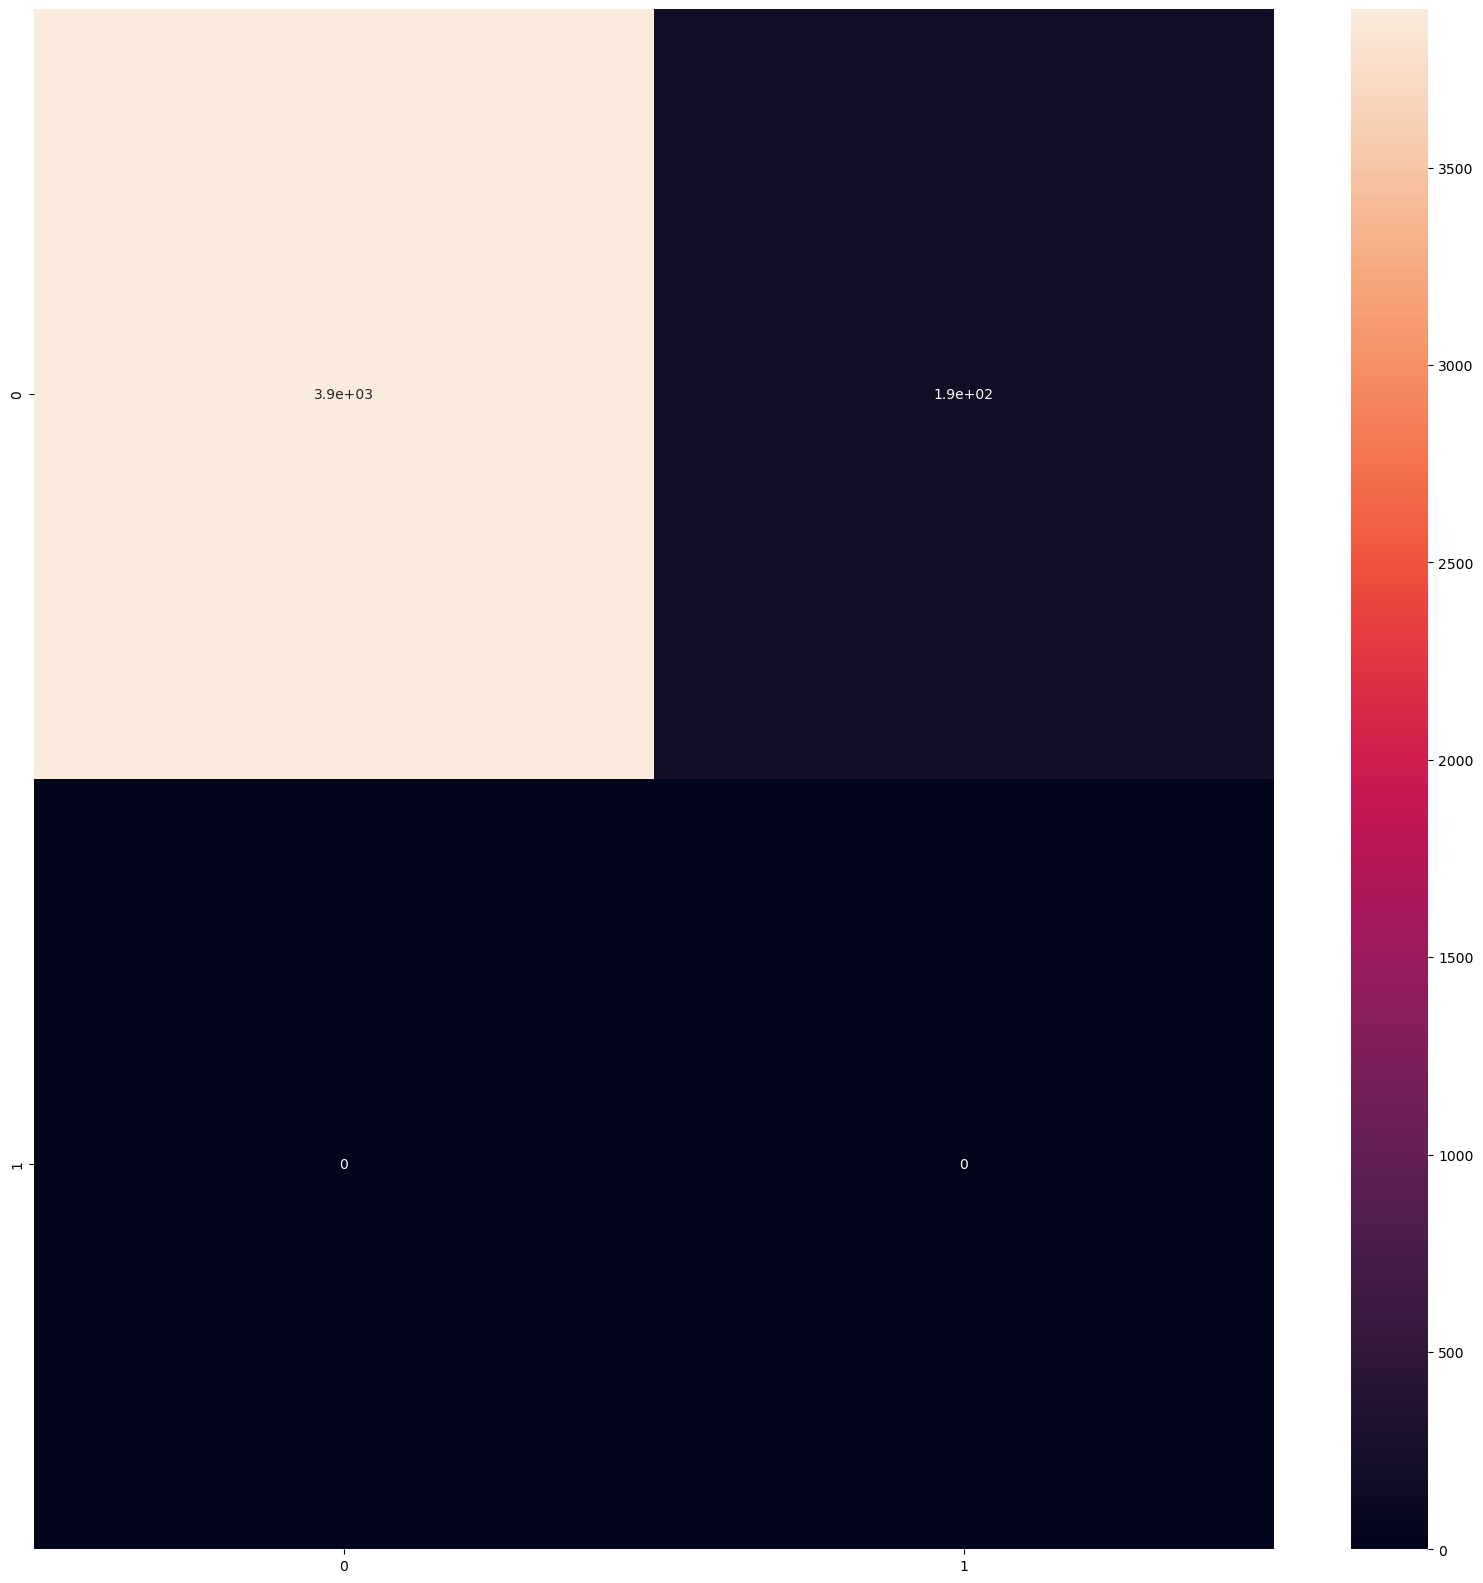

In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred1, y_train)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm,annot=True)

Confusion Matrix:
[[960  62]
 [  0   0]]


<AxesSubplot:>

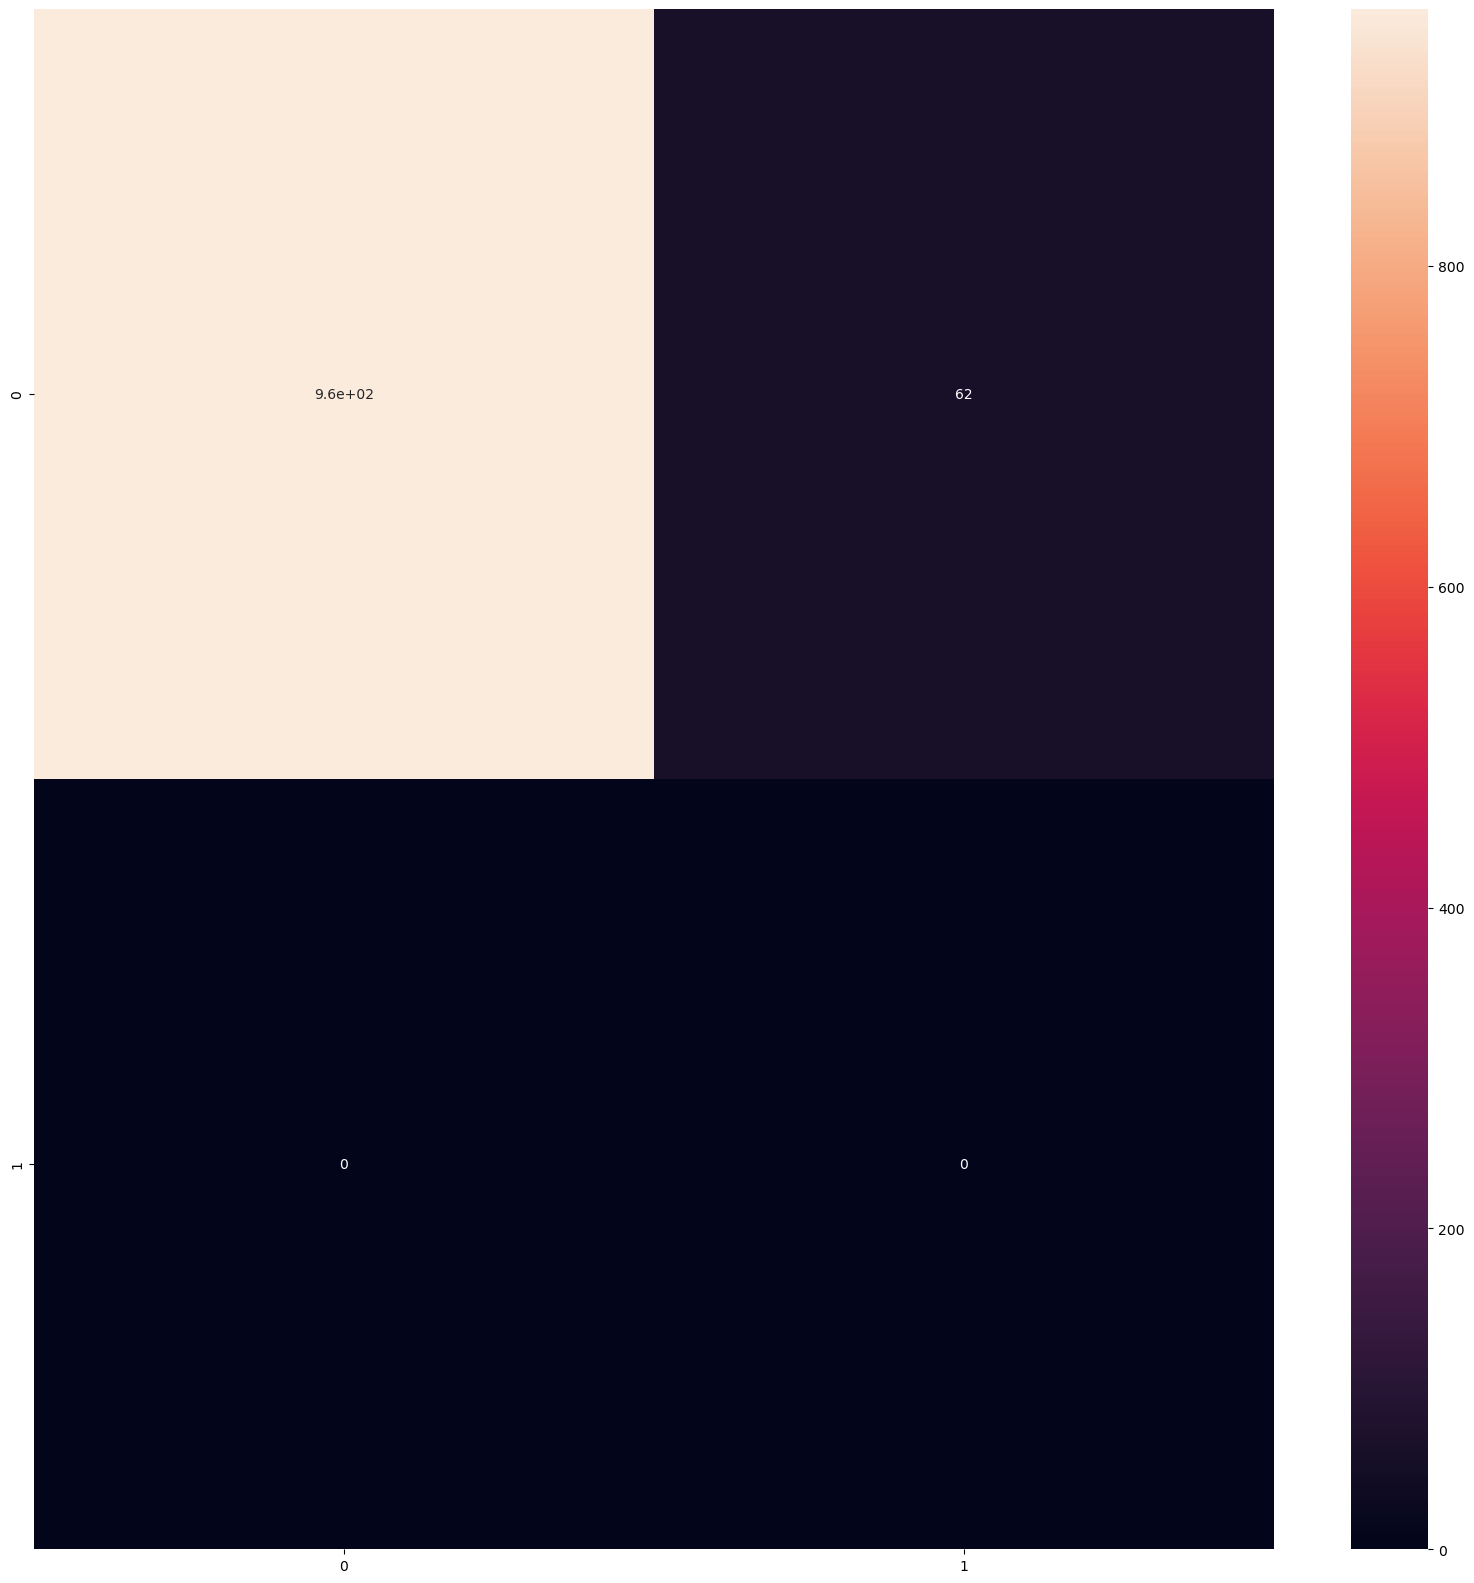

In [99]:
cm = confusion_matrix(pred2, y_test)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm,annot=True)

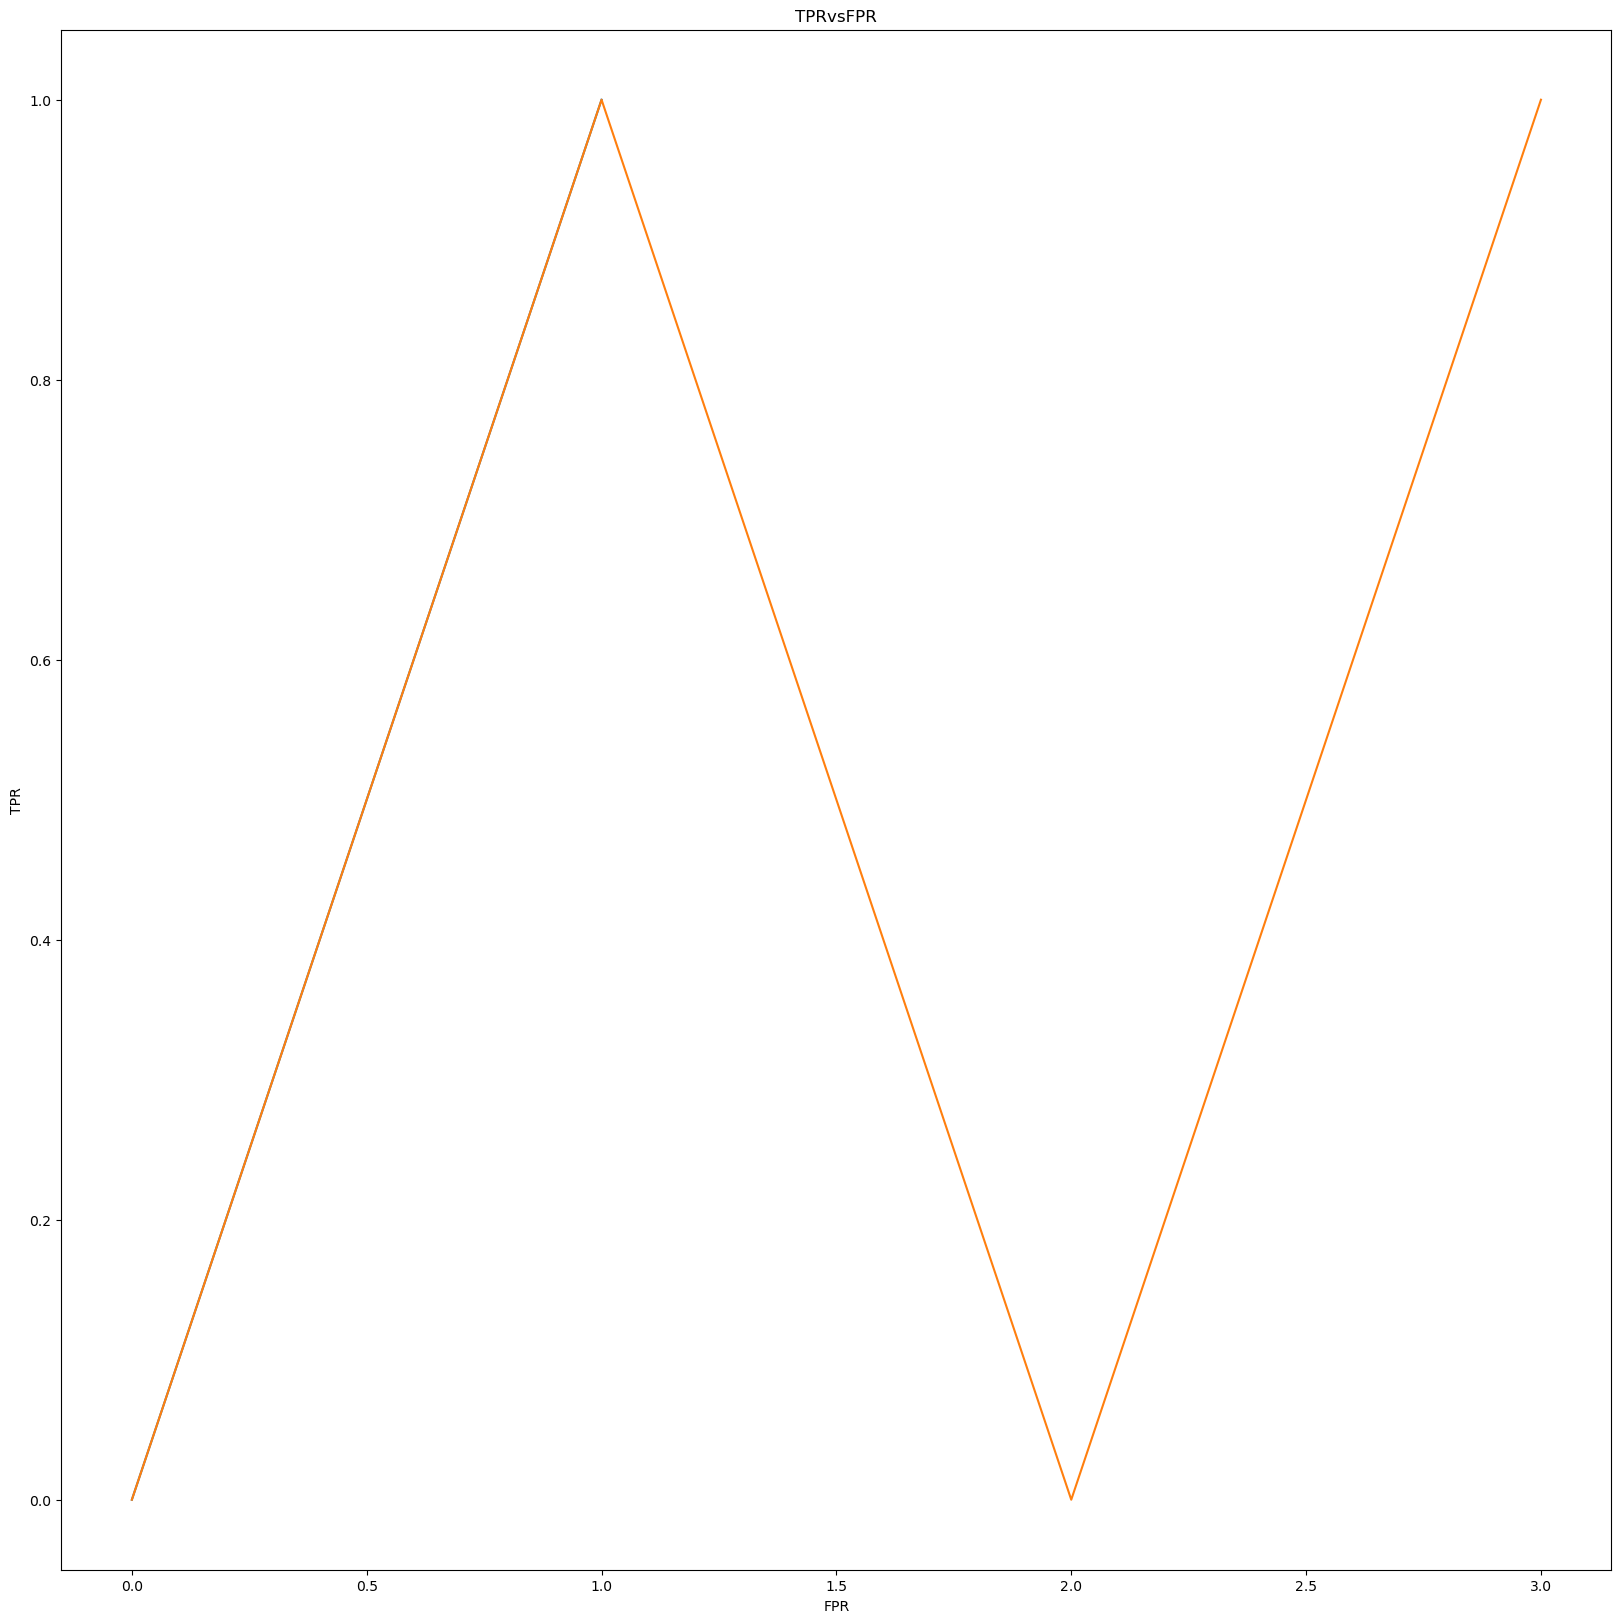

In [100]:
from sklearn.metrics import roc_curve
fpr,tpr,thr=roc_curve(y_train,pred1)
plt.plot(fpr,tpr,label='lr')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('TPRvsFPR')
plt.plot([0,1,0,1])
plt.show()

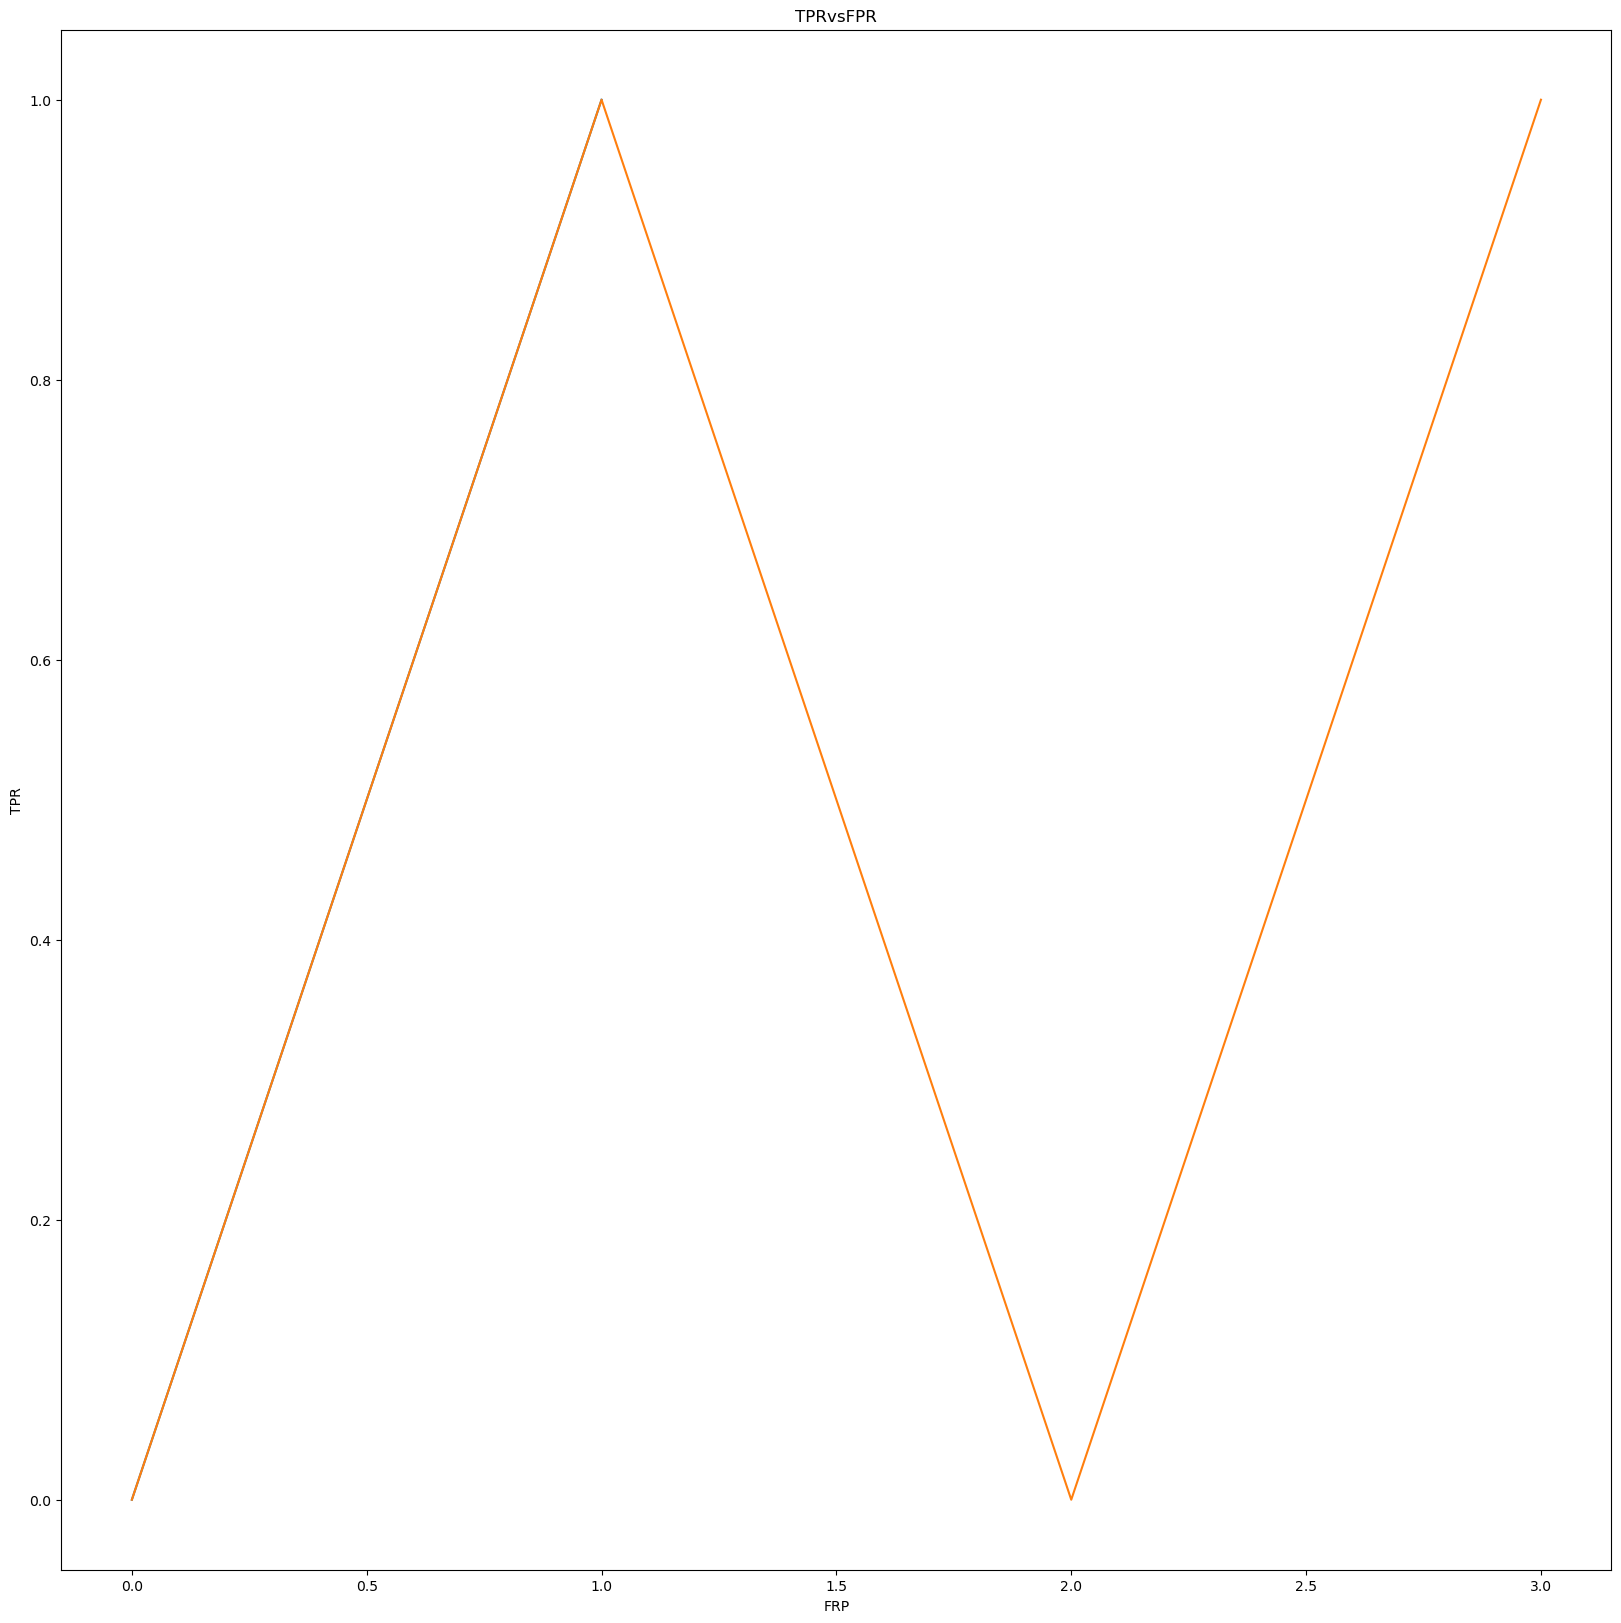

In [101]:
from sklearn.metrics import roc_curve
fpr,tpr,thr=roc_curve(y_test,pred2)
plt.plot(fpr,tpr,label='lr')
plt.xlabel('FRP')
plt.ylabel('TPR')
plt.title('TPRvsFPR')
plt.plot([0,1,0,1])
plt.show()

In [102]:
cv_scores = cross_val_score(lr, x, y, cv=5)
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores:", std_cv_score)

Cross-Validation Scores: [0.95107632 0.95107632 0.95107632 0.95107632 0.95205479]
Mean Cross-Validation Score: 0.9512720156555773
Standard Deviation of Cross-Validation Scores: 0.0003913894324853562


In [103]:

from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best model:",best_model)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best model: LogisticRegression(C=0.01, penalty='l1', solver='liblinear')


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [104]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred2)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random forest

In [105]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

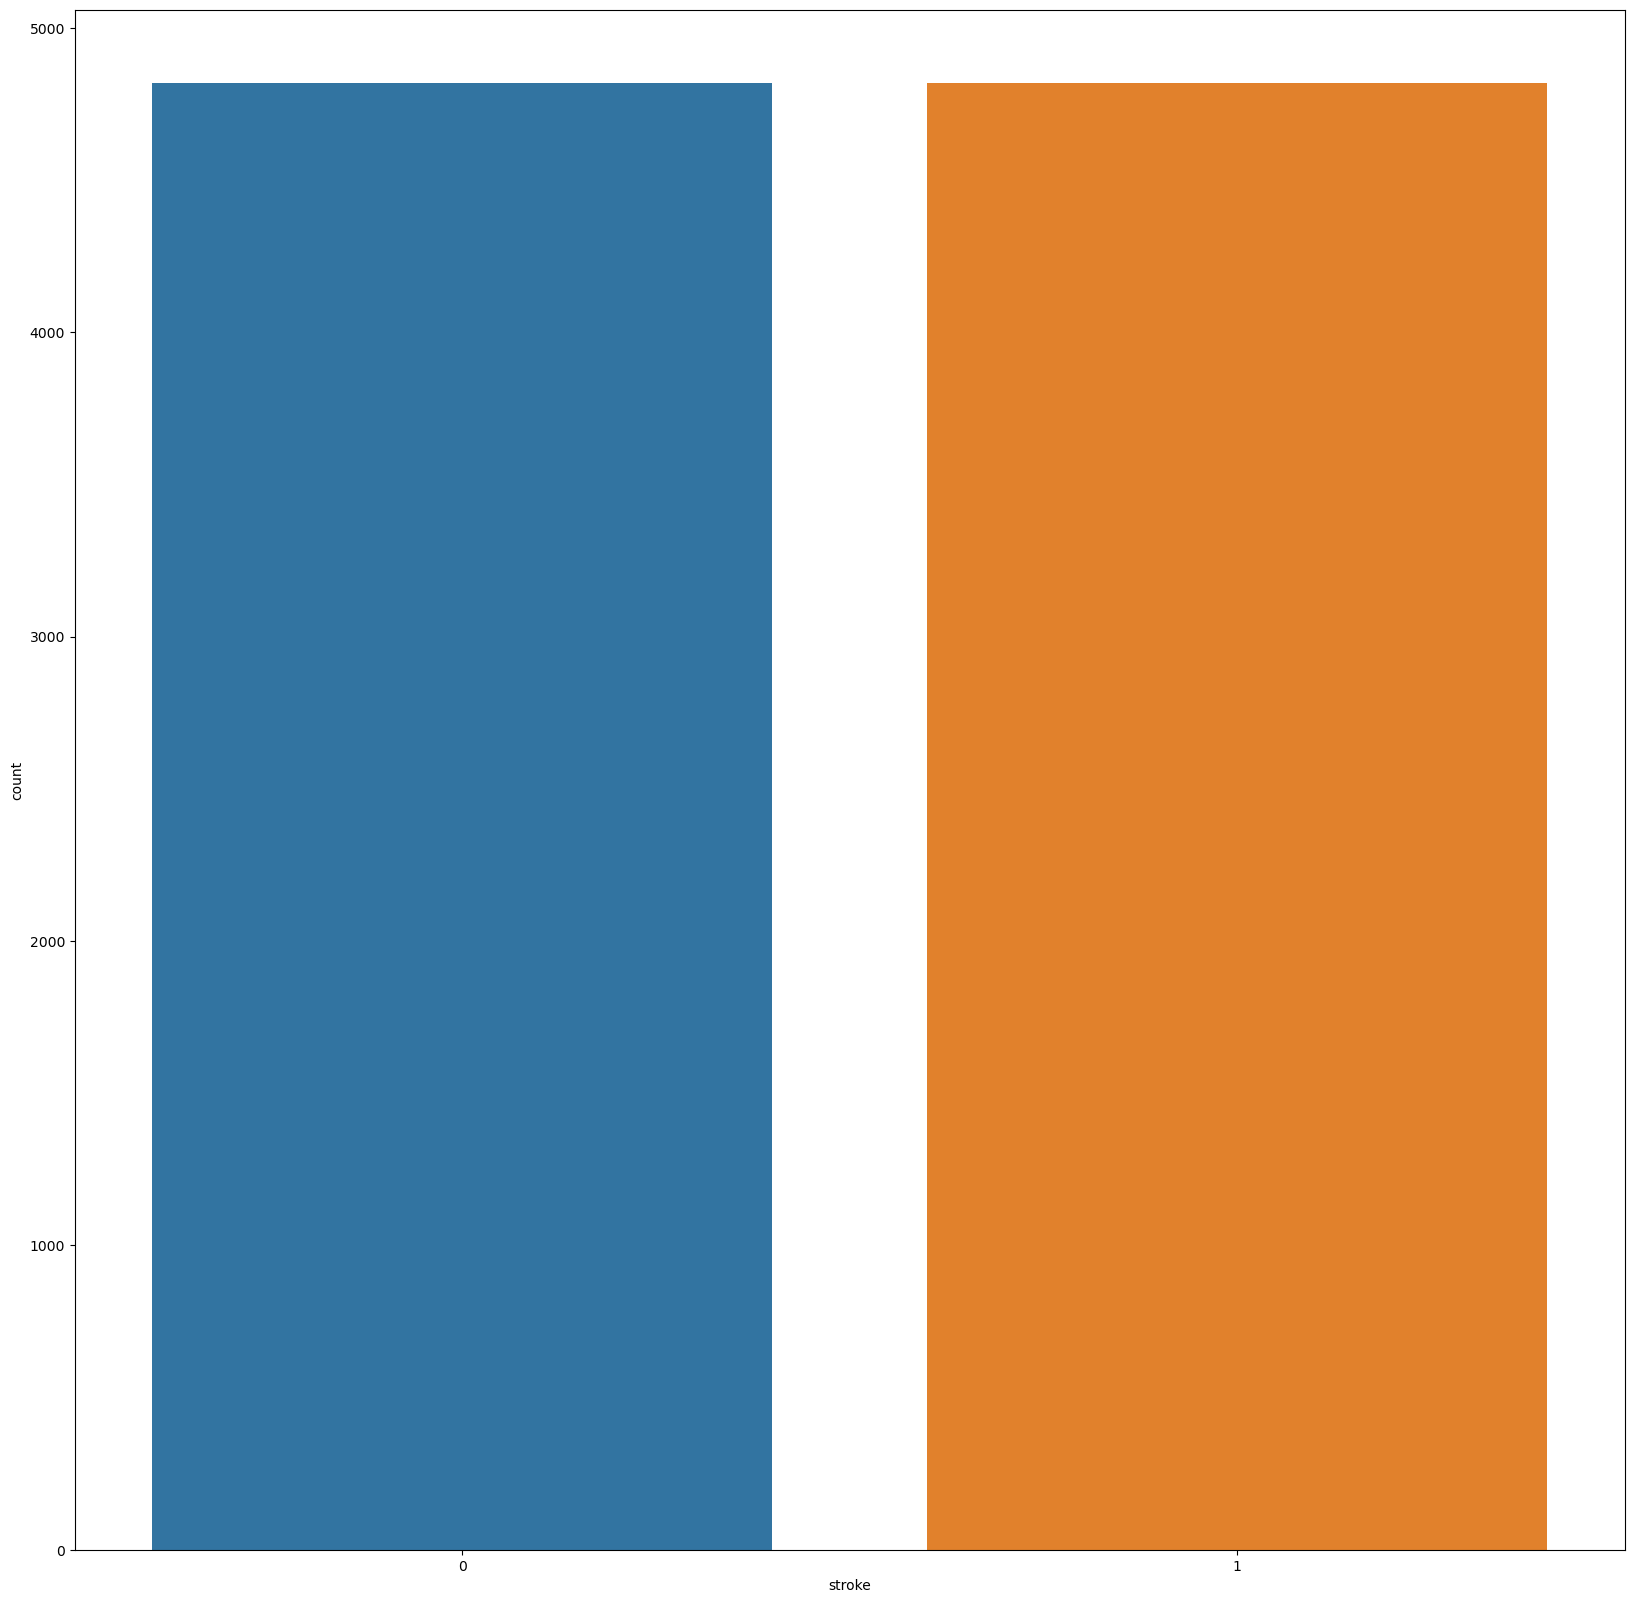

In [106]:
imb = SMOTETomek (random_state=42)
x,y = imb.fit_resample(x,y)
sns.countplot(y)

In [107]:
min_max=MinMaxScaler()
x1= min_max.fit_transform(x)
x=pd.DataFrame(x1,columns=x.columns)
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.242351,0.345129,0.000000,0.288609,0.276517,0.120782,0.242351,0.904130,0.118200,0.090467
1,0.000000,0.355368,0.000000,0.000000,0.312708,0.204884,0.000000,0.904008,0.097225,0.204615
2,0.427473,0.727659,0.000000,0.509066,0.487736,0.213042,0.000000,0.557149,0.228951,0.319142
3,0.000000,0.335411,0.000000,0.000000,0.367471,0.160510,0.322067,0.894700,0.166909,0.360672
4,0.000000,0.509410,0.376094,0.000000,0.345914,0.226641,0.000000,0.814024,0.083056,0.226343


In [108]:
from sklearn.model_selection import StratifiedKFold
rf = RandomForestClassifier()

In [109]:
parameters={
            'n_estimators': range(1,30,2),
            'max_depth': range (1, 15),
            'min_samples_leaf':range(1,15),
            'max_features':['auto','log2','sqrt'],
            'max_leaf_nodes': [10,20,30,40,50]
              }

In [110]:
skf=StratifiedKFold(random_state=42,n_splits=10,shuffle=True)
tune_model=RandomizedSearchCV(rf,parameters,scoring='accuracy',cv=skf,n_jobs=-1)

In [111]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [112]:
pred1=rf.predict(x_train)
acc1=accuracy_score(pred1,y_train)
print('accuracy_score on train data is :',acc1)

accuracy_score on train data is : 0.9997553816046967


In [113]:
pred2=rf.predict(x_test)
acc2=accuracy_score(pred2,y_test)
print('accuracy_score on test data is :',acc2)

accuracy_score on test data is : 0.9373776908023483


<AxesSubplot:>

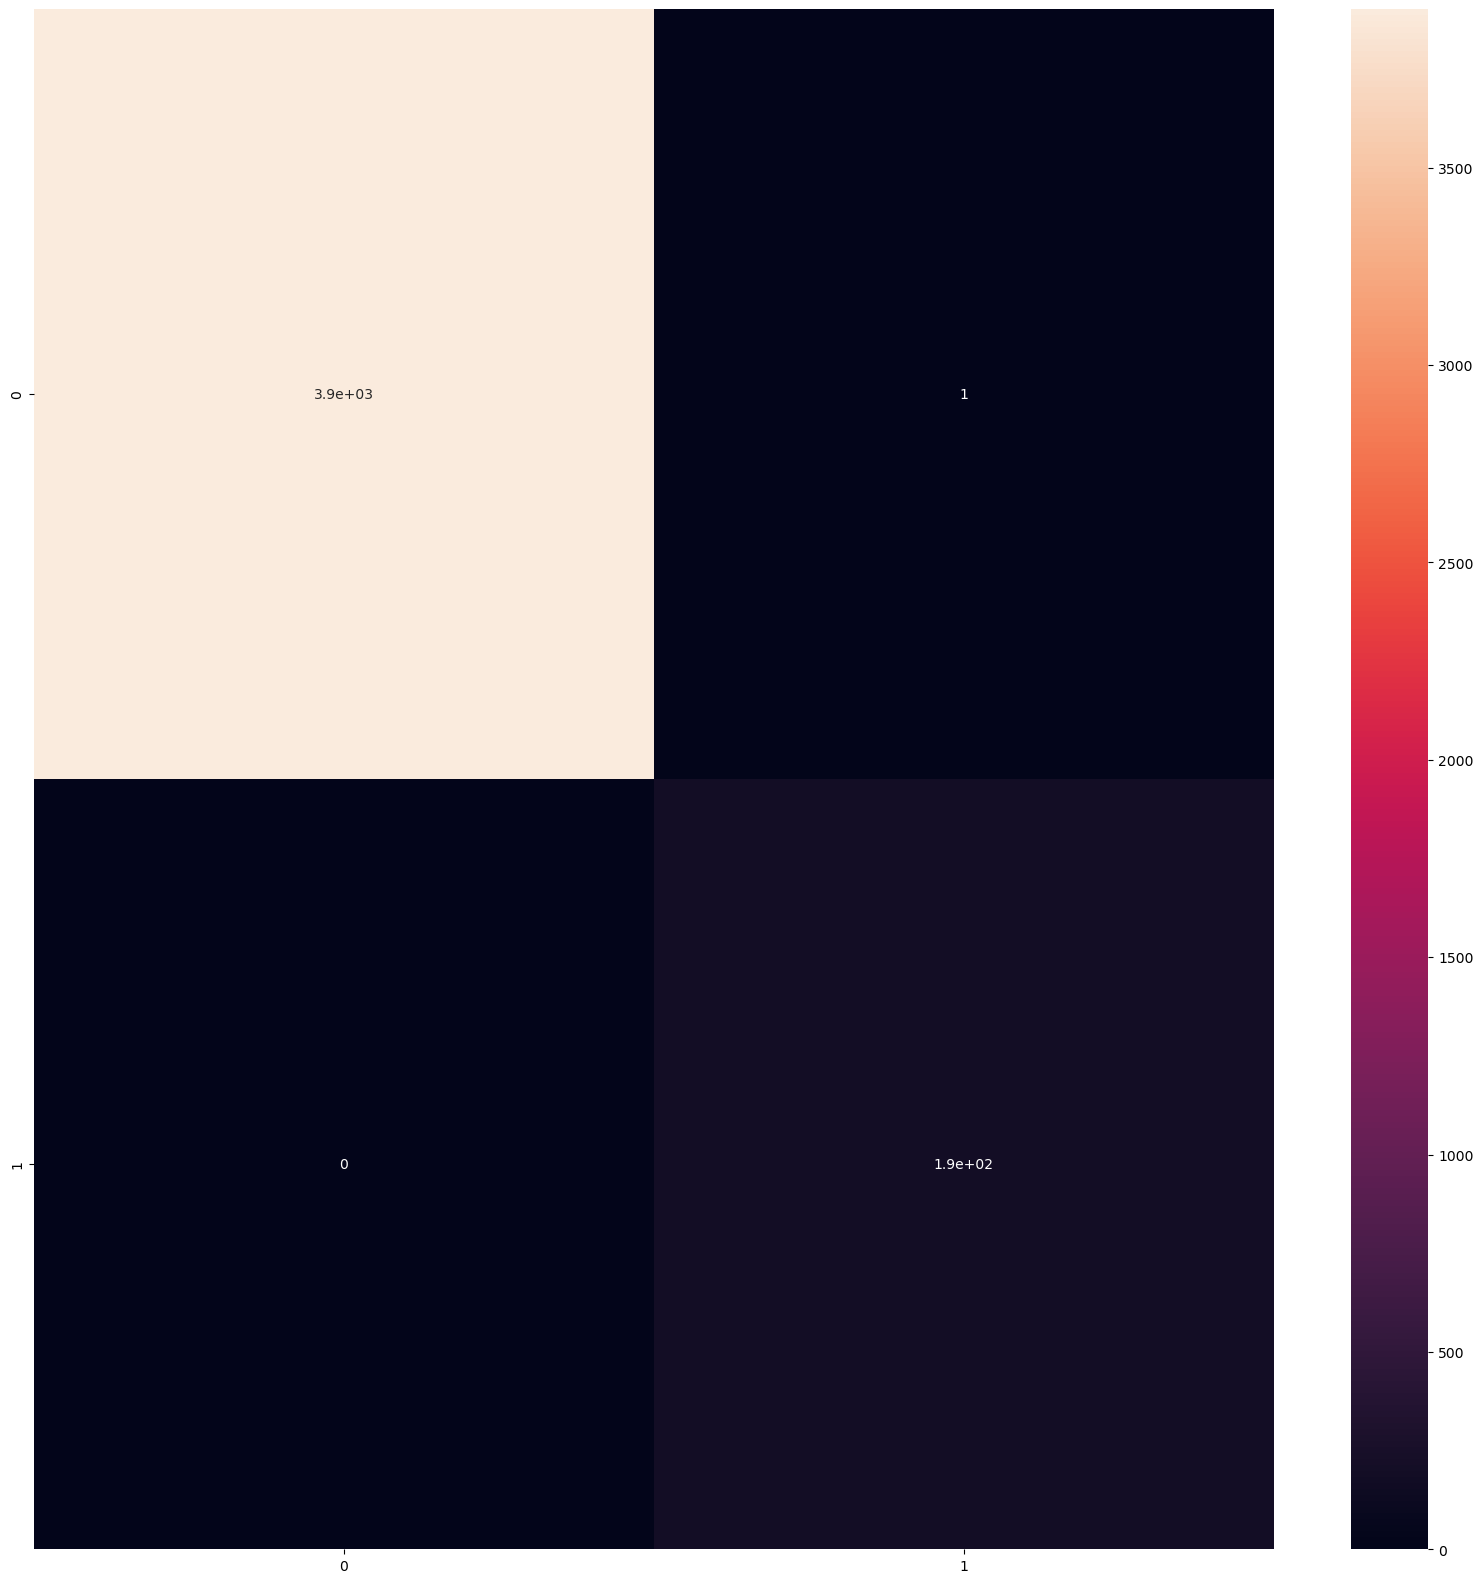

In [114]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(pred1,y_train)
sns.heatmap(c,annot=True)

<AxesSubplot:>

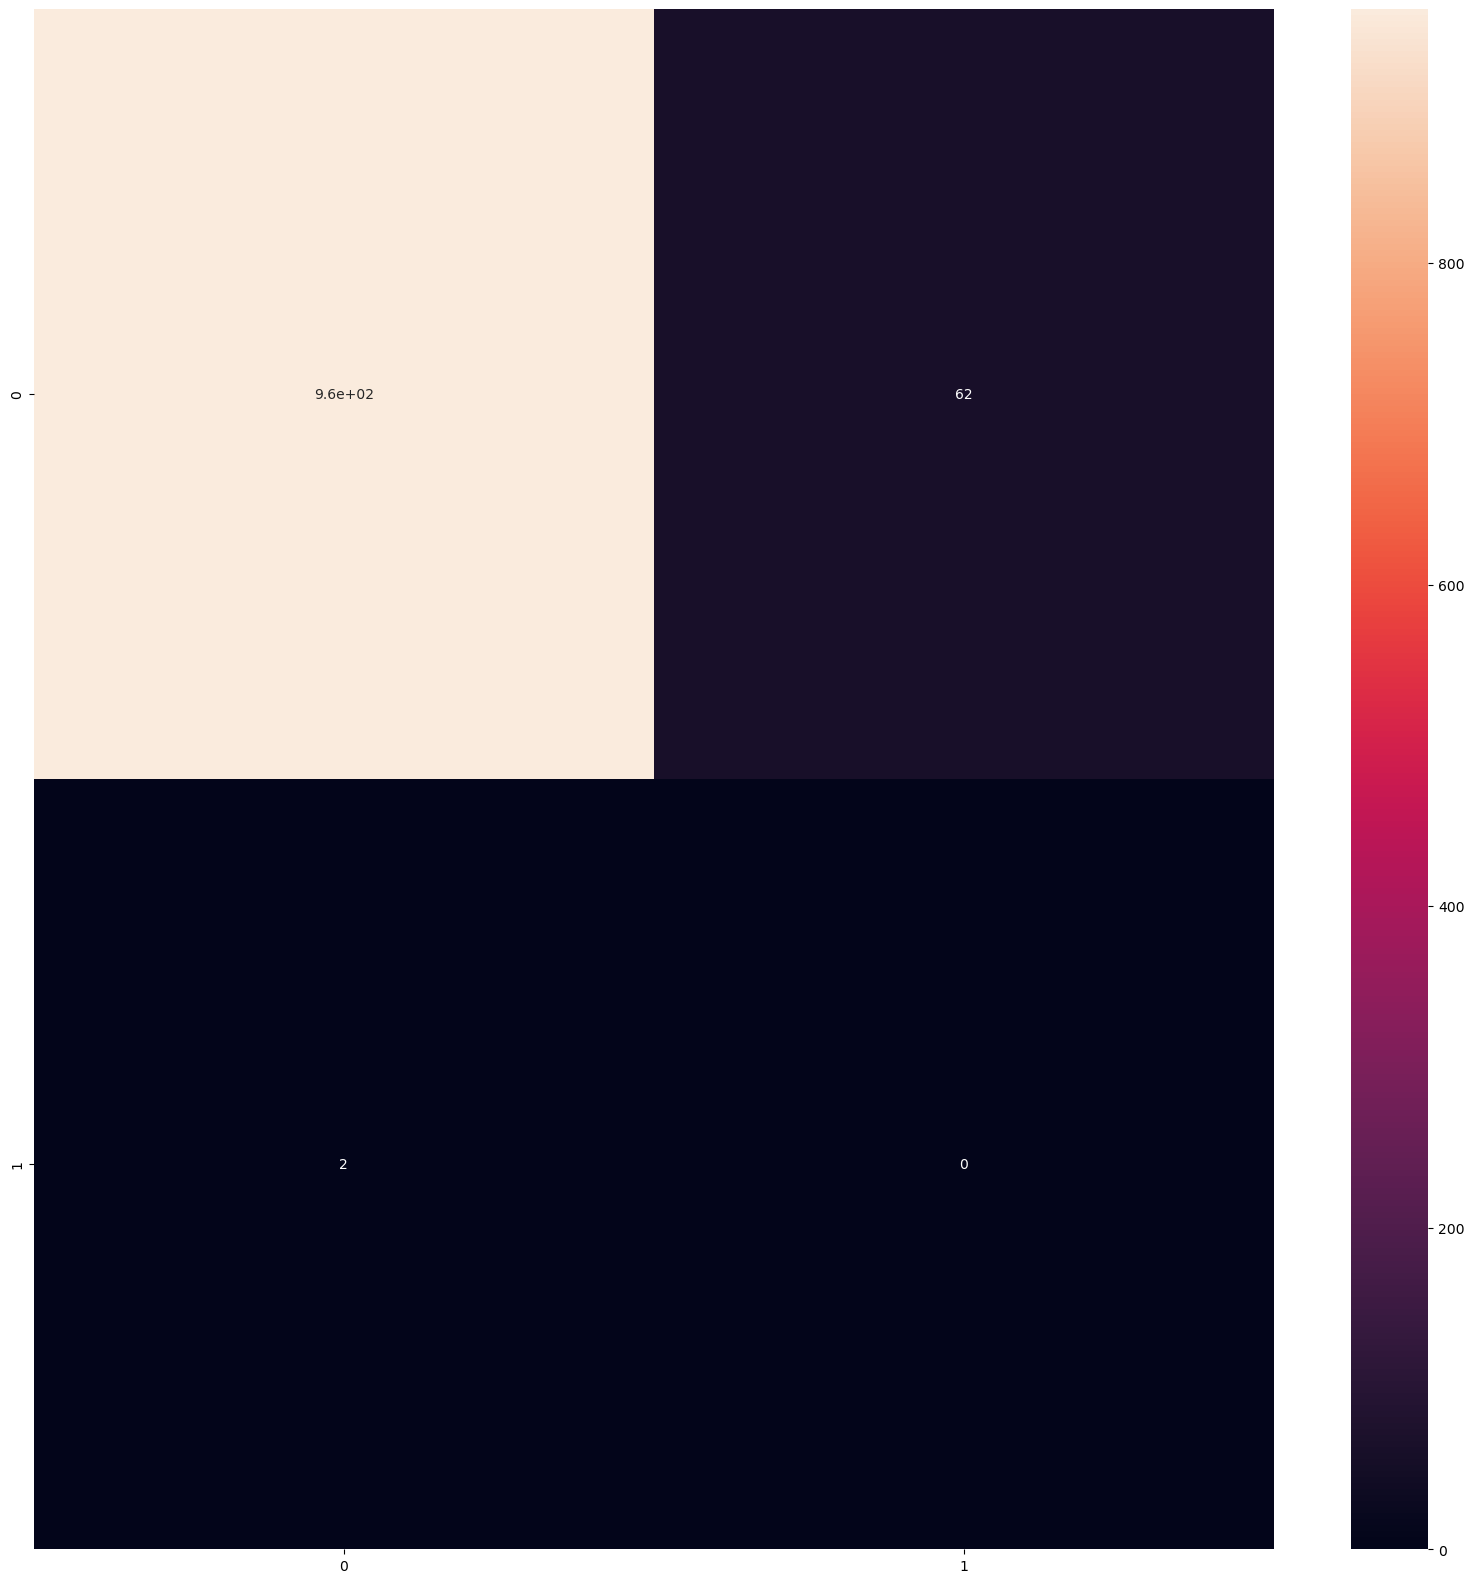

In [115]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(pred2,y_test)
sns.heatmap(c,annot=True)

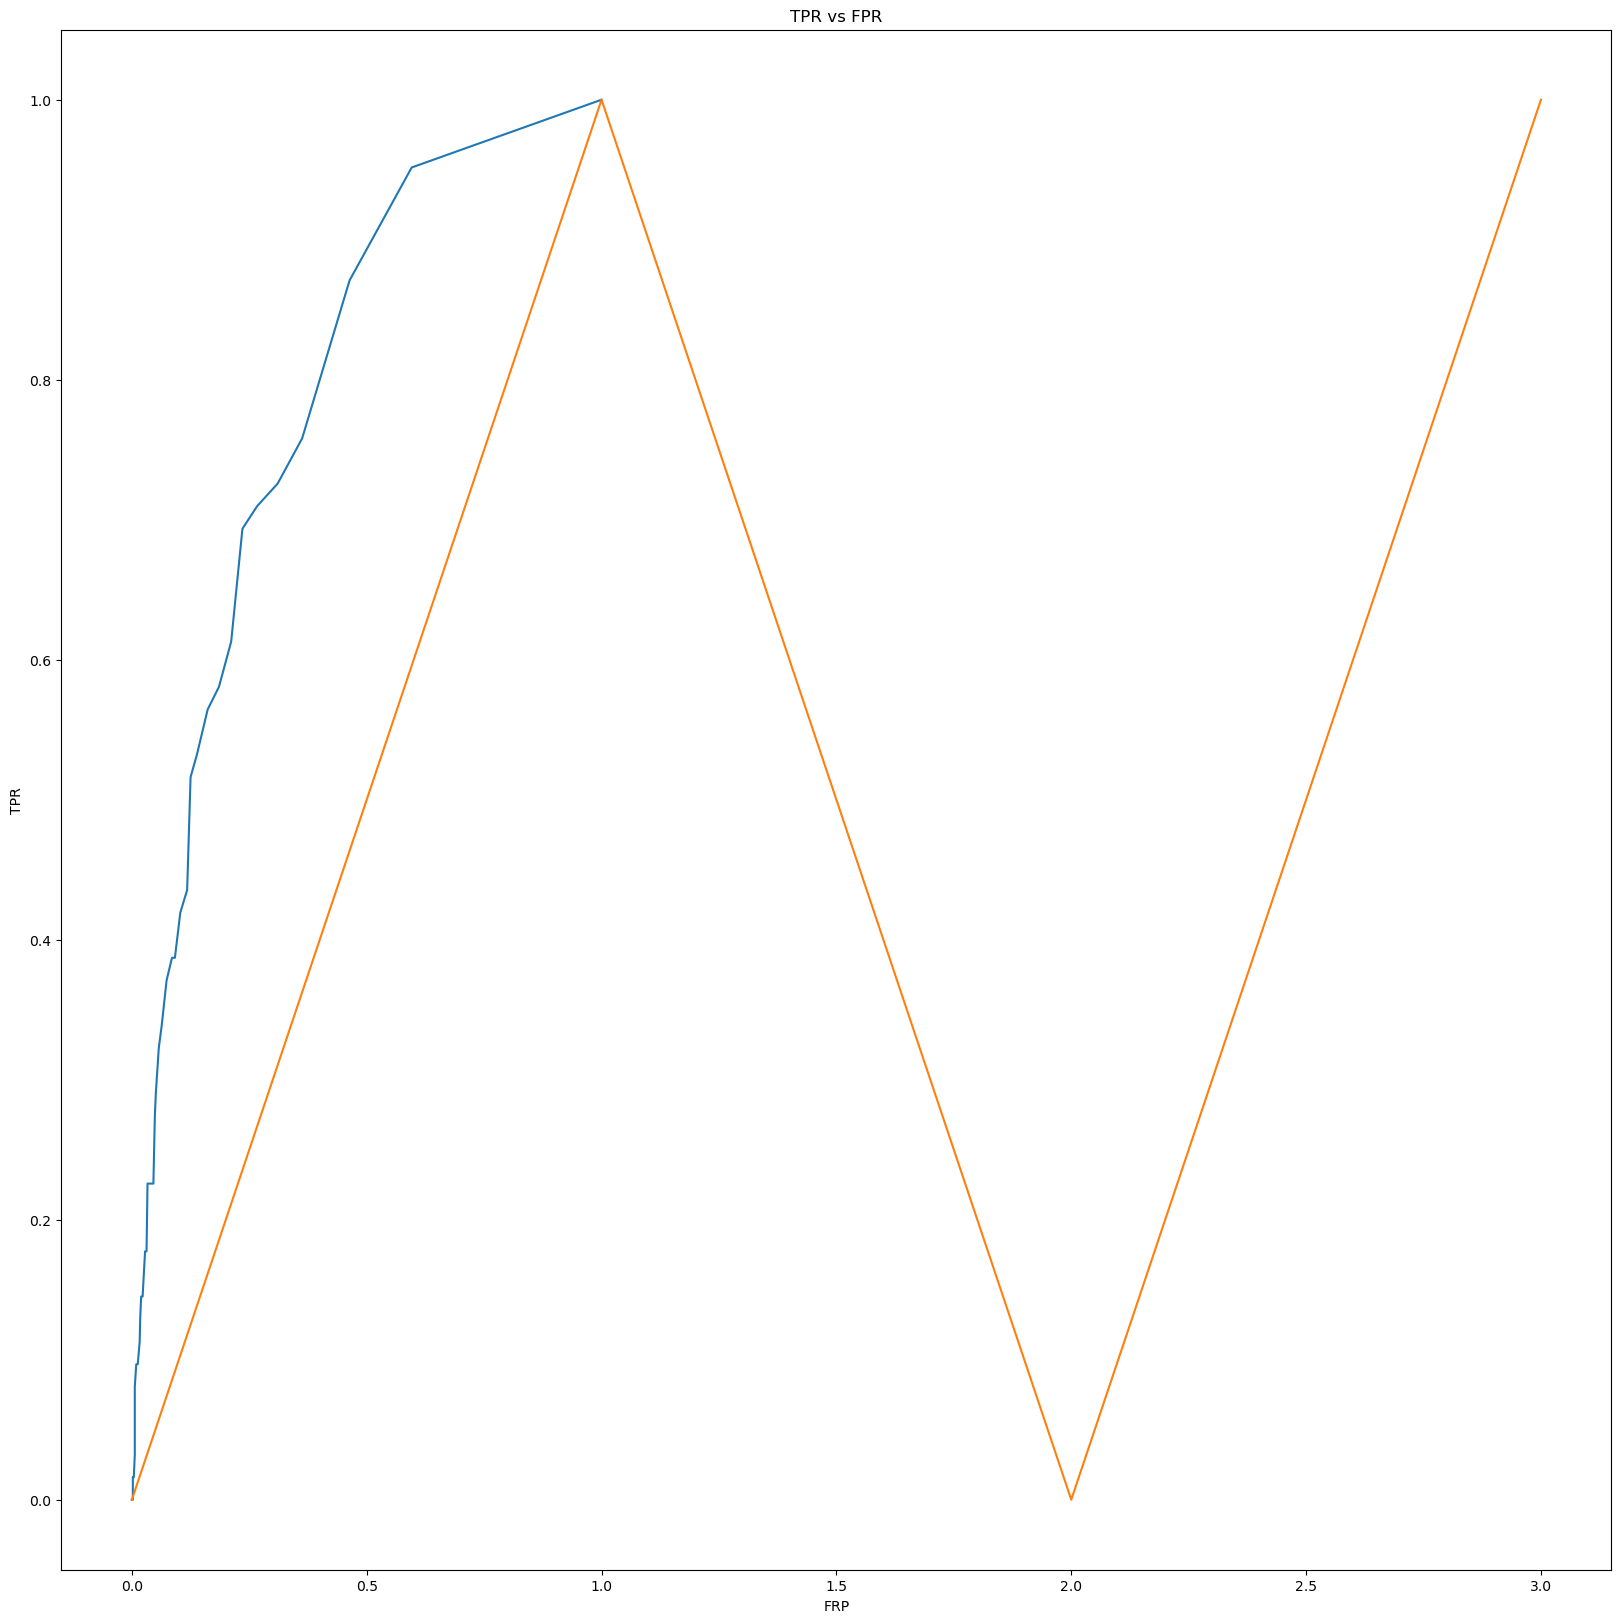

In [116]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_pred_proba=rf.predict_proba(x_test)[:,1]
fpr,tpr,thr=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr,label=rf)
plt.xlabel('FRP')
plt.ylabel('TPR')
plt.title('TPR vs FPR')
plt.plot([0,1,0,1])
plt.show()

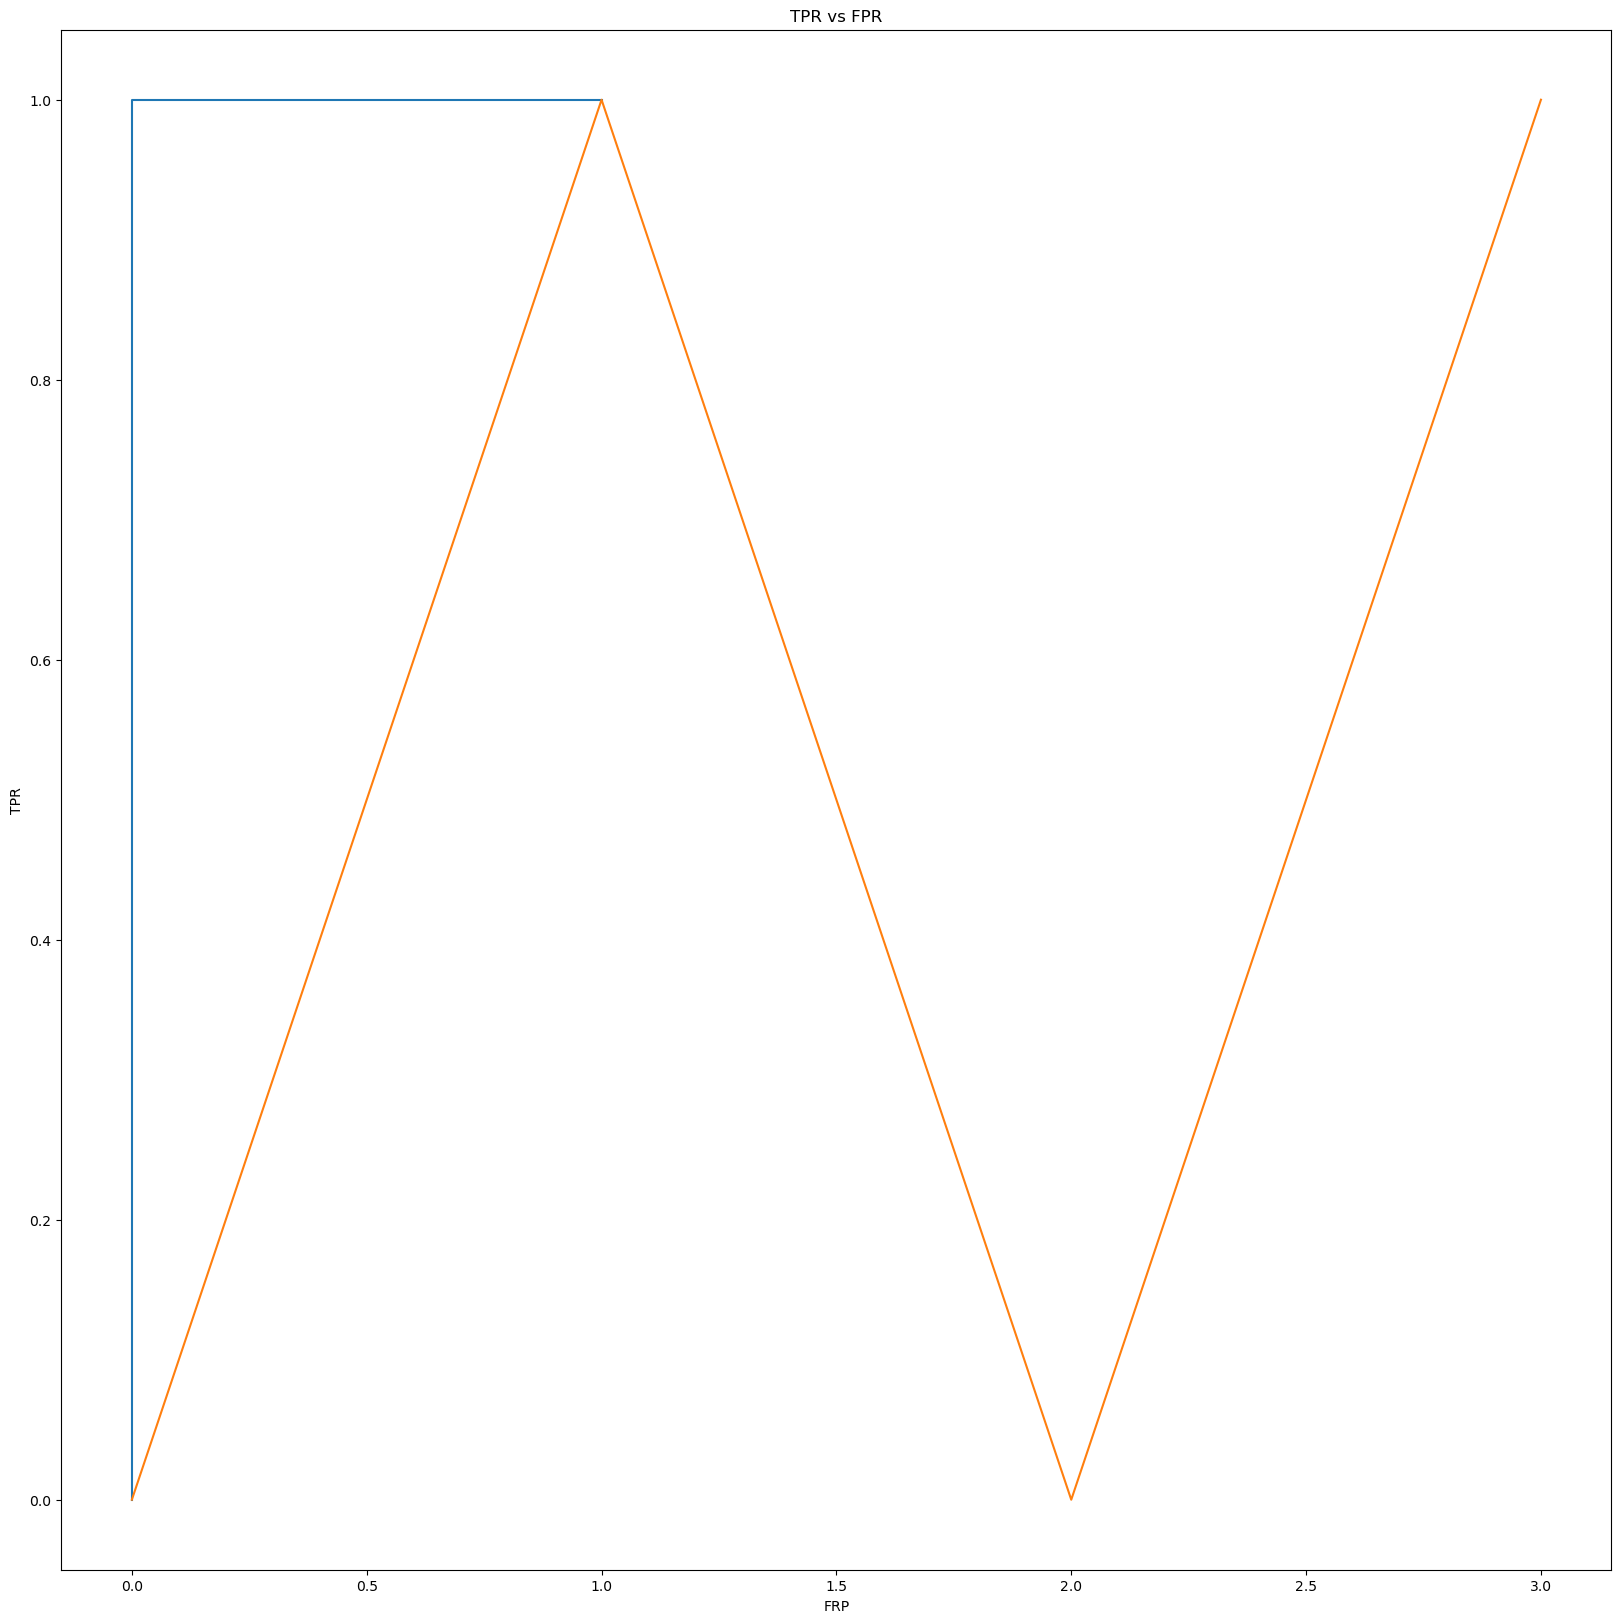

In [117]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_pred_proba=rf.predict_proba(x_train)[:,1]
fpr,tpr,thr=roc_curve(y_train,y_pred_proba)
plt.plot(fpr,tpr,label=rf)
plt.xlabel('FRP')
plt.ylabel('TPR')
plt.title('TPR vs FPR')
plt.plot([0,1,0,1])
plt.show()

In [118]:
from sklearn.metrics import classification_report
print (classification_report(pred1,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3902
           1       0.99      1.00      1.00       186

    accuracy                           1.00      4088
   macro avg       1.00      1.00      1.00      4088
weighted avg       1.00      1.00      1.00      4088



# DecisionTree 

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
DT = DecisionTreeClassifier(max_depth=12)

In [121]:
param_grid = {
    'max_depth' : [2,4,6,8,10,],
    'max_features': [0.5,0.8,0.9],
    'criterion': ['gini','entropy']
}

In [122]:
from sklearn.model_selection import KFold

In [123]:
cv_val=KFold(n_splits=10,random_state=42,shuffle=True)

In [124]:
from  sklearn.model_selection import GridSearchCV

In [125]:
grid_search = GridSearchCV(estimator=DT,param_grid=param_grid,scoring ='accuracy', cv=cv_val)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_


In [126]:
grid_search = GridSearchCV(DT, param_grid, cv=5, scoring='accuracy')

In [127]:
DT = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=[0.5, 0.8, 0.9])

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'max_features': [0.5, 0.8, 0.9]
}

DT = DecisionTreeClassifier(criterion='entropy', max_depth=3)


grid_search = GridSearchCV(DT, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)


best_max_features = grid_search.best_params_['max_features']

# Now create the DecisionTreeClassifier with the best max_features value
best_DT = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=best_max_features)


In [129]:
DT.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [130]:
y_pred = DT.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [131]:
y_test


4688    0
4478    0
3849    0
4355    0
3826    0
       ..
3605    0
4934    0
4835    0
4105    0
2902    0
Name: stroke, Length: 1022, dtype: int64

In [132]:
print('Accuracy:',accuracy_score(y_test, y_pred))

Accuracy: 0.9393346379647749


In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


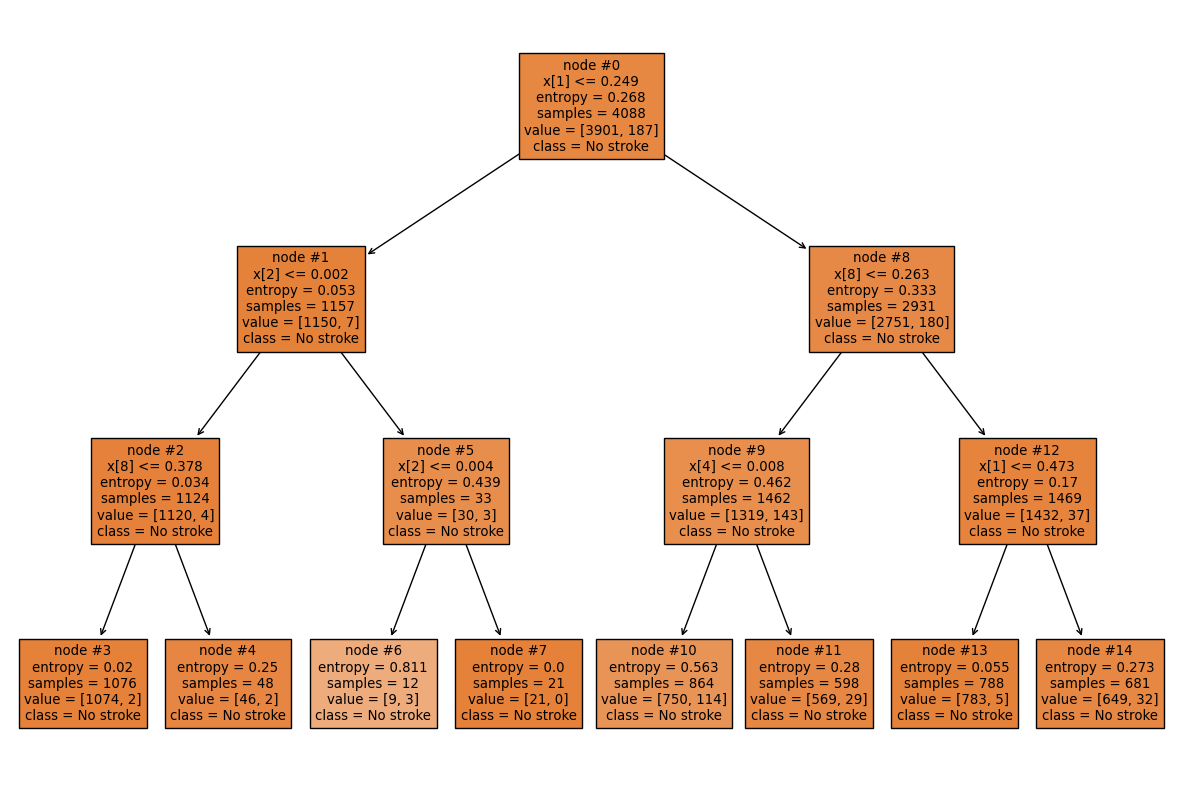

In [134]:
from sklearn import tree

class_names =  ['No stroke','stroke']

plt.figure(figsize=(15, 10))
tree.plot_tree(DT, filled=True, class_names=class_names, node_ids=True)
plt.show()

# svc

In [135]:
from sklearn.svm import SVC

In [136]:
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [137]:
y_pred=sv.predict(x_test)

In [138]:
print('Accuracy:',accuracy_score(y_test, y_pred))

Accuracy: 0.9393346379647749


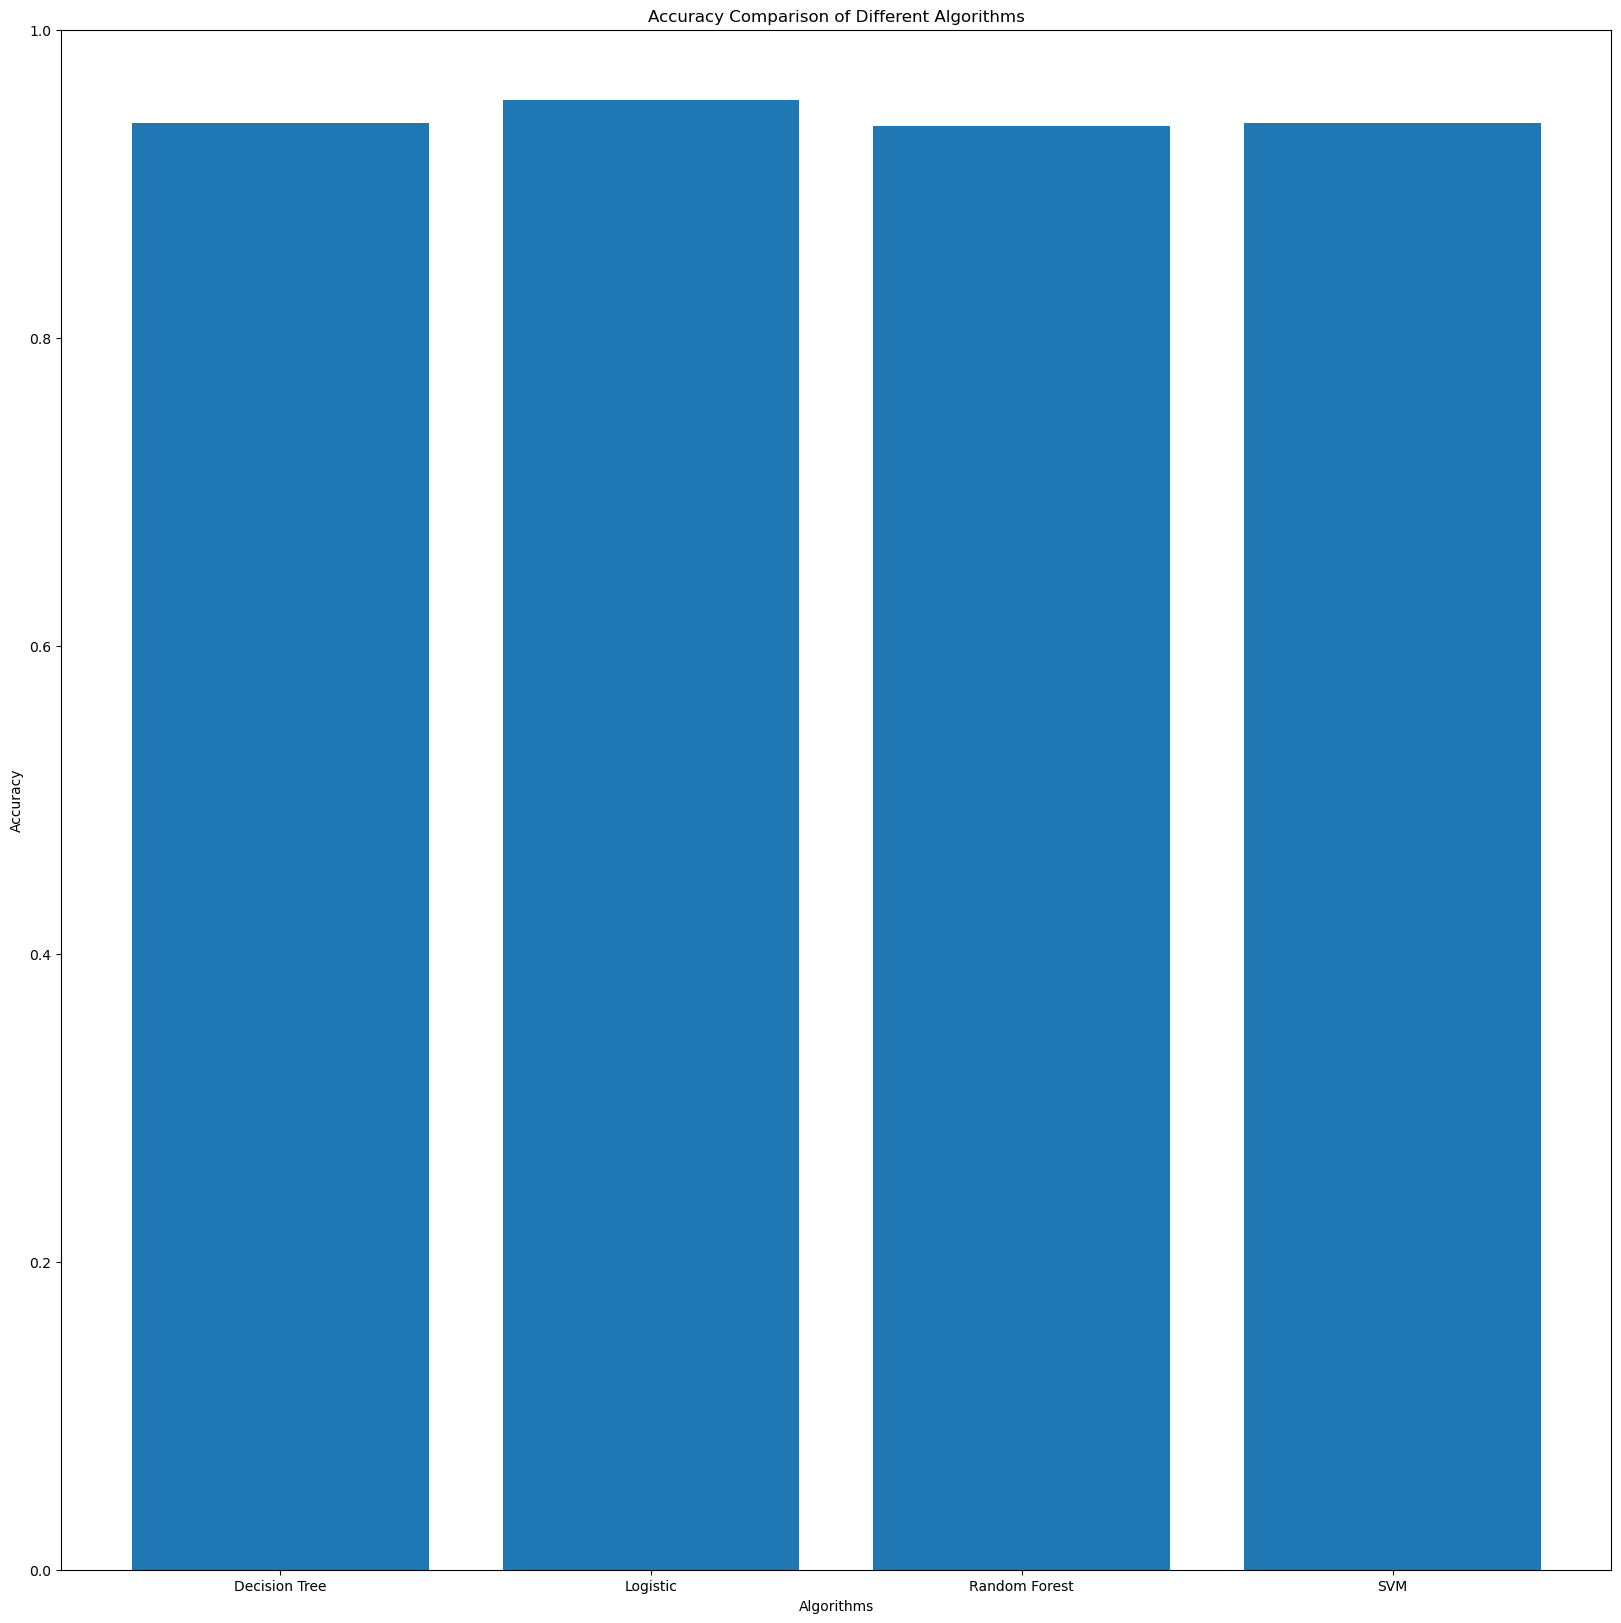

In [139]:
import matplotlib.pyplot as plt
accuracy_scores = [0.9393, 0.9542, 0.9373, 0.9393]

algorithms = ['Decision Tree', 'Logistic', 'Random Forest', 'SVM']

plt.bar(algorithms, accuracy_scores)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Different Algorithms")
plt.ylim(0, 1)  # Set the y-axis range between 0 and 1 for accuracy values
plt.show()

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict

In [150]:
svc=SVC()

In [151]:
C= [0.01,0.1,1.0,10]
Kernel = ['linear','poly','rbf','sigmoid']
gamma=['scale','auto']

In [152]:
Kernel = ['linear','poly','rbf','sigmoid']
gamma=['scale','auto']

In [153]:
Kernel = ['linear','poly','rbf','sigmoid']
gamma=['scale','auto']

In [154]:
params = dict(C=C,Kernel=Kernel,gamma=gamma)
params

{'C': [0.01, 0.1, 1.0, 10],
 'Kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'gamma': ['scale', 'auto']}

In [155]:
clf= GridSearchCV (SVC,params,cv=5)
clf

GridSearchCV(cv=5, estimator=<class 'sklearn.svm._classes.SVC'>,
             param_grid={'C': [0.01, 0.1, 1.0, 10],
                         'Kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'gamma': ['scale', 'auto']})

In [156]:
best_model = clf.best_estimator_
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
best_model.fit(x_train_std, y_train)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'